# NBA Hall of Fame or Ball of Lame

Video Link: [coming soon](https://www.youtube.com/watch?v=dQw4w9WgXcQ)
<br>

Name: Cobi Toeun <br>

Email: u1230512@utah.edu -- cobitoeun6901@gmail.com <br>

UID: u1230512 <br>

## Introduction and Description:

The *Naismith Memorial Basketball Hall of Fame* honors players who have shown exceptional skill at basketball, all-time great coaches, referees, and other major contributors to the sport. As part of the inaugural class of 1959, four players were inducted; over 150 more individuals have been inducted as players since then. As of 2022, players are eligible for the Hall of Fame after they have been fully retired from play for at least three years. 

A player or staff member can be considered a hall of famer for many different reasons; however, a predictive model is going to be trained on Hall of Fame eligible players to determine recently retired and current *NBA players* chances through stats, awards, and accomplishments. *If a player is currently active, we will assume they will retired at the end of the season.* <br>

#### Note:
**International Players:** There have been NBA players who have been known to have outstanding international careers, hence they were inducteed due to those acheivements. However, many of these player's NBA careers never really met expectations, so their stats may deviate from players who have strong accomplishments in the NBA. Regardless, I won't remove these players so there is no bias. <br>

**Coaches and Contributors:** Many Hall of Fame coaches such as Phil Jackson, Pat Riley, and Jerry Sloan have had careers as players, however, most were average. In addition, a few Hall of Fame players have been inducted as contributors of the NBA. These include game analysts, reporters, journalist, and many others. When computing the correlation matrix, I won't be counting these players to remove outliers (Hall of Fame players will be labled based on how they were inducted: Player, Coach, or Contributor). <br>

## Objectives:

What makes an NBA player one of the greatest in league history? <br>

To answer this question and multiple others, I am going to web scrape (using *python*) the stats of recently retired and current (2021-2022 season) NBA players and train a model to predict their qualifications and probability as a future NBA Hall of Famer (and potential First Ballot HoF). 
<br>

To determine which players would be considered as a Hall of Famer, I am going to look at all previous Hall of Famers who were inducted as an **NBA player**. <br>


**Questions to consider:**

- What factors make a player likely to be inducted into the hall of fame?
- What is the probablity of making it to the hall of famer for recently retired and current players?
- Do championships alone determine a players greatness, or can a player be considered an all-time great without a championship?
- What are the most common variables among current hall of famers? Which provide the strongest correlations?
- Can I create a probabilistic classification model to predict the probability a player has to be chosen as a hall of famer based only on current stats?
- Can I create binary classification model to predict which current and recently retired players are going to be first ballot inductees?
- Can both models predict who are the 2023 Hall of Fame inductees? Can the models go a step further and predict who are first ballots?

**Benefits (What to learn and accomplish):**

- Use python libraries, including dataframes, beautifulsoup, mathplotlib, etc, to gather and express results scraped from [Basketball-Reference.com](https://www.basketball-reference.com/).
- Gain better knowledge on python web scraping and determining what methods are best used in certain scenarios.
- Clean extracted data and format into desired dataframes and csv files.
- Explore and visualize the differences between players based on Hall of Fame status
- Create a model and algorithm to predict a players chance of being a Hall of Famer or first ballot HoF, based on current Hall of Famers.
- Determine the most accurate models for binary classification and probabablity.

## Python Methods:
**Methods:**
- Web scraping (beautiful soup)
- String formatting
- Loops and Conditional Statements
- Algorithms and Data Structures (dictionaries, sets, lists to store data; algorithms for extraction and cleaning)
- Dataframes and CSV files (store extracted data as a dataframes; csv files for data analysis)
- Regex
- Predictive Models (Choose models with the best accuracy given most correlated predictive variables):
    - Logistic Regression, SVM, Naive Bayes (*Probablisitc Classification*: predict probability of HoF chances)
    - SVM, Decision Tree, Random Forest, K-NN (*Binary Classification*: predict whether recently retired/current player is first ballot Hall of Famer)

**Data Visualizations:**
- Correlation Matrix (Check which variables best correlate with current Hall of Fame players)
- Heat Maps (Visualize correlation matrix)
- Graphs (Line, Bar, Plot) (showcase stats, awards among hof and non-hof players)

## Data Description and Processing Summary:
All data has been web scraped from [Basketball-Reference.com](https://www.basketball-reference.com/).
To prevent webpage overload, I have created an algorithm to download every page I need to complete analysis and predictions. All pages can be found in the [*Webpages*](Webpages) folder.
<br>

**Before computing Hall of Fame predictions, this is the data to search and extract:**
- Debut (Year), Last Active (Year), YOE, Active or Retired, Total Games
- Career points, rebounds, assists, blocks, and steals (per game and percentage)
- Averages (FG%, eFG%, FG3%, FT%, PER, WS)
- Awards and Accomplishments (All-Stars, MVPs, Championships, DPOYs, All-NBA, etc.)
- Year Inducted, Inducted as Player or Coach or Contributor (For current HoF's)
<br> <br>

**Here is an example of Michael Jordan's career stats and accomplishments:**
![mj_stats](images/mj_stats.png)
<br>

Using my browers built-in inspect function, I can view each HTML element then extract MJ's awards and stats using BeautifulSoup and my custom functions: <br>
![mj_awards.png](images/inspect_awards.png)
![image-4.png](images/inspect_stat.png)

After categorizing all the data extracted and storing them into a dataframe, I have converted each dataframe to a csv file so there would be no need to re-run the web scraping process each time you or I want to access it. CSV files can be accessed in [*csv_files*](csv_files) folder. <br>

**All acquired and cleaned data, with in-depth descriptions, will be present in [webscraping-cleaning.ipynb](webscraping-cleaning.ipynb)** <br>

All data have been downloaded and extracted from these pages:
- [Basketball-Reference Homepage](https://www.basketball-reference.com/)
- [NBA Player Directory](https://www.basketball-reference.com/players/)
- [Michael Jordan Career Stats](https://www.basketball-reference.com/players/j/jordami01.html) (we'll use MJ's page as an example, but I've scraped from all NBA players)

### Import libraries and load csv files

In [643]:
# import necessary libraries
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore') 

from sklearn import tree, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

pd.set_option("display.max_rows", 100, "display.max_columns", 100)

## Exploratory Analysis

Here we will do actual analysis. Since we have already converted the dataframes to csv files, we won't have to run all the web-scraping algorithms. Again, if you would like a more in-depth overview of each categorical variable, please view [webscraping-cleaning.ipynb](webscraping-cleaning.ipynb).

In [2]:
# read csv files and store as dataframes
all_nba_players = pd.read_csv('csv_files/all_nba_players.csv')
retired_csv = pd.read_csv('csv_files/retired_players.csv')
hof_players = pd.read_csv('csv_files/hall_of_fame_players.csv')
retired_non_hof_csv = pd.read_csv('csv_files/retired_non_hof.csv')
active_csv = pd.read_csv('csv_files/active_players.csv')

#### Here is a basic overview of all NBA players:

In [72]:
# note that ABA or BAA players are not considered here
all_nba_players

,Player,Debut,Last Active,YOE,Retired,Position,Team,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,First Ballot,Inducted as Player,Inducted as Coach,Inducted as Contributor,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team,HOF Probability
0,Alaa Abdelnaby,1990,1995,5,1,PF,POR,256,5.7,1465,3.3,846,0.3,85,0.3,71,0.3,69,50.2,0.0,70.1,50.2,13.0,1.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002423
1,Zaid Abdul-Aziz,1968,1978,10,1,C,HOU,505,9.0,4557,8.0,4065,1.2,601,0.6,131,1.0,205,42.8,0.0,72.8,0.0,15.1,1.8,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003223
2,Kareem Abdul-Jabbar,1969,1989,20,1,C,LAL,1560,24.6,38387,11.2,17440,3.6,5660,0.9,1160,2.6,3189,55.9,5.6,72.1,55.9,24.6,13.7,273.4,1,1,1,0,0,1995,19,2,1,0,0,4,6,15,1,1,11,0,0,0,0,6,2,1,1.000000
3,Mahmoud Abdul-Rauf,1990,2001,9,1,PG,DEN,586,14.6,8553,1.9,1087,3.5,2079,0.8,487,0.1,46,44.2,35.4,90.5,47.2,15.4,2.8,25.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.006062
4,Tariq Abdul-Wahad,1997,2003,6,1,SG,DEN,236,7.8,1830,3.3,776,1.1,266,0.8,184,0.4,83,41.7,23.7,70.3,42.2,11.4,0.6,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4392,Paul Zipser,2016,2018,2,1,SF,CHI,98,4.7,458,2.6,256,0.8,82,0.4,35,0.3,31,37.1,33.5,76.9,44.8,6.1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001150
4393,Ante Žižić,2017,2020,3,0,C,CLE,113,6.0,674,3.9,446,0.6,64,0.2,22,0.4,40,58.1,0.0,71.1,58.1,17.4,1.2,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003019
4394,Jim Zoet,1982,1983,1,1,C,DET,7,0.3,2,1.1,8,0.1,1,0.1,1,0.4,3,20.0,0.0,0.0,20.0,-0.8,-0.1,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001107
4395,Bill Zopf,1970,1971,1,1,PG,MIL,53,2.2,118,0.9,46,1.4,73,0.0,0,0.0,0,36.3,0.0,55.6,0.0,9.6,-0.1,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001084


In [649]:
# lets see some stats for all players who have played in the nba
display(all_nba_players.describe())
# lets also check out the stats for all hof players
display(hof_players.describe())

,Debut,Last Active,YOE,Retired,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,First Ballot,Inducted as Player,Inducted as Coach,Inducted as Contributor,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team,HOF Probability
count,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.000000,4397.00000,4397.000000,4397.000000,4397.000000,4397.000000
mean,1991.204003,1996.766432,5.268820,0.807824,290.551740,6.455788,2992.915624,2.942188,1291.967478,1.456902,667.068228,0.459177,196.698658,0.269343,122.587901,41.443484,17.307619,67.131385,36.414373,11.044485,1.508710,14.771139,0.035934,0.013418,0.031612,0.002502,0.001819,71.900614,0.411417,0.017057,0.016375,0.016602,0.010917,0.010917,0.209234,0.203775,0.112349,0.019331,0.126450,0.008187,0.008870,0.017967,0.00887,0.016830,0.012054,0.017285,0.041680
std,20.994117,21.249146,4.500436,0.394056,320.393188,4.823565,4725.649713,2.276650,2129.285266,1.392988,1213.283236,0.414007,336.844494,0.368878,291.804208,10.820365,17.165869,20.159278,20.840834,6.664832,2.081922,27.272577,0.186146,0.115070,0.174986,0.049960,0.042621,372.476628,1.663636,0.254049,0.269305,0.270555,0.157809,0.168947,0.717566,1.171334,0.315832,0.137702,0.834822,0.090123,0.113524,0.180725,0.14040,0.217916,0.169542,0.130344,0.170088
min,1946.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.600000,-2.000000,-10.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000195
25%,1976.000000,1982.000000,1.000000,1.000000,34.000000,2.900000,97.000000,1.300000,42.000000,0.500000,19.000000,0.100000,2.000000,0.000000,0.000000,37.600000,0.000000,62.300000,30.000000,8.700000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.001212
50%,1993.000000,2000.000000,3.000000,1.000000,143.000000,5.200000,761.000000,2.400000,351.000000,1.000000,152.000000,0.400000,36.000000,0.200000,15.000000,42.700000,17.600000,71.800000,45.300000,11.600000,0.700000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.001954
75%,2010.000000,2016.000000,8.000000,1.000000,490.000000,8.700000,3948.000000,3.900000,1713.000000,2.000000,752.000000,0.700000,250.000000,0.400000,110.000000,46.900000,32.700000,78.400000,49.800000,14.200000,2.400000,17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.005187
max,2021.000000,2022.000000,22.000000,1.000000,1611.000000,30.100000,38387.000000,22.900000,23924.000000,11.200000,15806.000000,2.700000,3265.000000,3.500000,3830.000000,100.000000,100.000000,100.000000,150.000000,88.

,Debut,Last Active,YOE,Retired,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,First Ballot,Inducted as Player,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team
count,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,1971.287770,1984.510791,12.913669,1.0,900.690647,17.786331,16424.604317,7.570504,6791.244604,3.767626,3513.043165,0.863309,721.287770,0.616547,553.079137,46.372662,14.994245,76.487770,31.412950,19.115108,7.472662,99.966906,1.0,0.352518,1.0,1999.877698,7.014388,0.431655,0.374101,0.345324,0.093525,0.107914,1.640288,4.237410,0.532374,0.258993,1.733813,0.007194,0.043165,0.438849,0.143885,0.431655,0.273381,0.453237
std,15.792699,17.914194,3.699749,0.0,290.791744,4.843944,7545.813219,3.967868,4445.868163,1.968970,2433.898780,0.679316,742.733341,0.757819,839.057227,5.189703,15.464695,7.565046,24.507348,3.298109,2.670499,50.683444,0.0,0.479482,0.0,16.109886,4.032451,1.268631,1.336627,1.333581,0.448703,0.534202,2.200155,3.966495,0.500755,0.439666,3.282751,0.084819,0.236842,0.808605,0.596623,1.056727,0.787638,0.499609
min,1946.000000,1953.000000,3.000000,1.0,202.000000,5.700000,1591.000000,1.800000,261.000000,1.000000,356.000000,0.000000,0.000000,0.000000,0.000000,30.200000,0.000000,41.400000,0.000000,10.400000,1.900000,11.600000,1.0,0.000000,1.0,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1958.000000,1970.500000,11.000000,1.0,715.000000,14.750000,10929.500000,4.250000,3523.500000,2.400000,1857.000000,0.000000,0.000000,0.000000,0.000000,43.550000,0.000000,73.250000,0.000000,17.200000,5.700000,68.250000,1.0,0.000000,1.0,1987.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,1984.000000,13.000000,1.0,897.000000,18.200000,16310.000000,6.700000,5602.000000,3.400000,2910.000000,1.000000,587.000000,0.300000,172.000000,46.600000,14.700000,77.800000,47.000000,18.900000,7.000000,91.100000,1.0,0.000000,1.0,2001.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1984.500000,1999.500000,15.000000,1.0,1072.500000,20.550000,20910.500000,10.050000,9103.500000,4.450000,4381.500000,1.300000,1198.000000,0.850000,732.000000,50.350000,27.950000,80.700000,50.800000,21.150000,8.700000,127.650000,1.0,1.000000,1.0,2014.500000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2003.000000,2018.000000,21.000000,1.0,1611.000000,30.100000,38387.000000,22.900000,23924.000000,11.200000,15806.000000,2.600000,3265.000000,3.100000,3830.000000,58.200000,66.700000,90.400000,58.200000,27.900000,17.700000,273.400000,1.0,1.000000,1.0,2022.000000,19.000000,10.000000,11.000000,9.000000,3.000000,4.000000,11.000000,15.000000,1.000000,1.000000,15.000000,1.000000,2.000000,4.000000,4.000000,6.000000,6.000000,1.000000


Just by using the describe() function we can see here that the average NBA player doesn't do too well in the league with only 6ppg, 3rpg, 1apg. 

### Plots and Graphs

Here we will visually see trends for current hofs and retired non-hofs. We will look at the averages, totals, and advanced stats. <br>

Data Visualizations:
- **Bar Graphs**:
    - Positions with most Hall of Famers
    - Franchises with most Hall of Famers
    - Per Game Stats by Hall of Fame Status (PPG, RPG, APG, SPG, BPG)
    - Per Game Percentages by Hall of Fame Status (FG%, FG3%, FT%, PER, etc) <br>
- **Scatter Plots**:
    - Total Games and PTS for Retired Players (HoF and Non-HoF)
    - Total RBS and AST for Retired Players (HoF and Non-HoF)
    - Total STL and BLK for Retired Players (HoF and Non-HoF) <br>
    - NBA Championships by Hall of Fame Status
    - MVPs by Hall of Fame Status
    - Finals MVPs by Hall of Fame status
- **Distribution Histograms**:
    - Seasons played (HOF vs Non-HOF -- First Ballot vs Non-First Ballot)
    - Win Shares played (HOF vs Non-HOF -- First Ballot vs Non-First Ballot)
    - All-Stars played (HOF vs Non-HOF -- First Ballot vs Non-First Ballot)
    - All-NBAs played (HOF vs Non-HOF -- First Ballot vs Non-First Ballot)
- **Correlation Graphs**:
    - Hall of Fame Correlation Heat Map
    - Correlations between Variables: (Inducted as Player, First Ballot)

I am going to be narrow down the data to only retired players who are eligible to be considered so the plots and models can get an accurate representation of Hall of Fame status for each player. To be eligible for the 2023 Hall of Fame, a player needs to be retired for at least 3 seasons, hence those last active in 2019 are eligible.

I want the models to predict 2023 Hall of Fame inductees, so lets grab data from those retired *before* 2019.

In [74]:
# we'll only want to train and look at data from those who are officially elligible to enter -- retired at least 4 years
retired_hof_eligible = retired_csv[retired_csv['Last Active'] <= 2018].dropna();
print(retired_hof_eligible.shape)

(3302, 49)


In [117]:
# split hof and non-hof players
hof = retired_hof_eligible[retired_hof_eligible['Inducted as Player'] == 1]
non_hof = retired_hof_eligible[retired_hof_eligible['Inducted as Player'] == 0]

### Bar Plots:

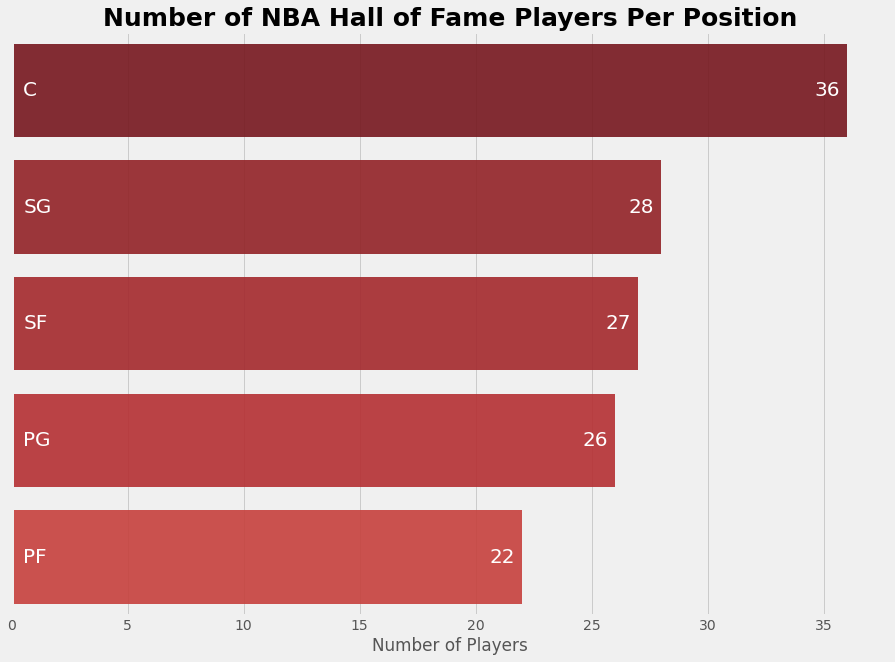

In [476]:
# get count of all positions for current hof players
num_pos = hof_players['Position'].dropna().value_counts()[:5] # there are only five positions
hof_num_pos = pd.DataFrame(num_pos)
hof_num_pos.columns = ['Number of Players']

plt.figure(figsize=(14,10))
sns.barplot(x='Number of Players', y=hof_num_pos.index, data=hof_num_pos, 
            palette=sns.color_palette("Reds_r", 15), alpha=0.9)
plt.title('Number of NBA Hall of Fame Players Per Position', fontsize=25, fontweight="bold")
plt.gca().set_yticks([]);

# visually showcase position and counts on bars
for num in range(len(num_pos)):
    plt.text(num_pos[num]-1.4, num, num_pos[num], color='white', size=20, verticalalignment='center')
    plt.text(0.5, num, num_pos.index[num], color='white', size=20, verticalalignment='center')

# lets save the graph to view later
plt.savefig('graphs/hof_per_pos.png')
plt.show()

It's interesting to see that most players who have been inducted are centers. Lets note this fact because it will come up later when we look at correlations and create our models for predictions.

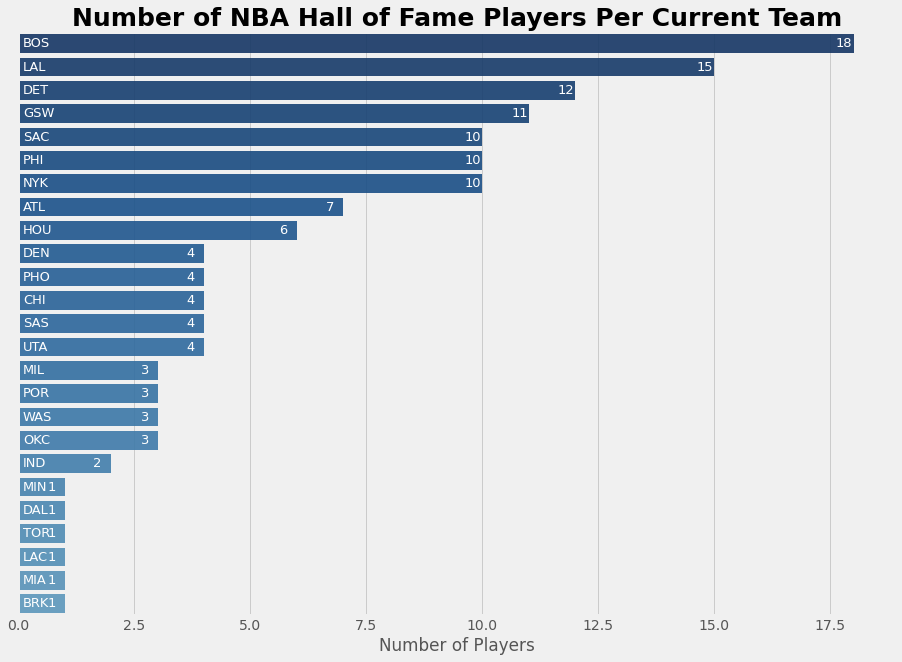

In [457]:
num_teams = hof_players['Team'].value_counts()[:30]
hof_num_teams = pd.DataFrame(num_teams)
hof_num_teams.columns = ['Number of Players']

plt.figure(figsize=(14,10))
sns.barplot(x='Number of Players', y=hof_num_teams.index, data=hof_num_teams, 
            palette=sns.color_palette("Blues_r", 60), alpha=0.9)
plt.title('Number of NBA Hall of Fame Players Per Current Team', fontsize=25, fontweight="bold")
plt.gca().set_yticks([]);

for num in range(len(num_teams)):
    plt.text(num_teams[num]-0.38, num, num_teams[num], color='white', size=13, verticalalignment='center')
    plt.text(0.1, num, num_teams.index[num], color='white', size=13, verticalalignment='center')

plt.savefig('graphs/hof_per_team.png')
plt.show()

The top two franchises are unsurprising due to the fact that the Lakers and Celtics both lead in NBA Championships, with 17.

Franchises who don't have don't have a hof player associated with them include:
- Cleveland Cavaliers
- Memphis Grizzlies
- Charlotte Hornets
- New Orleans Pelicans
- Orlando Magic

However, **Lebron James** is likely going to be the first for Cleveland and **Chris Paul** will be the first for New Orleans.

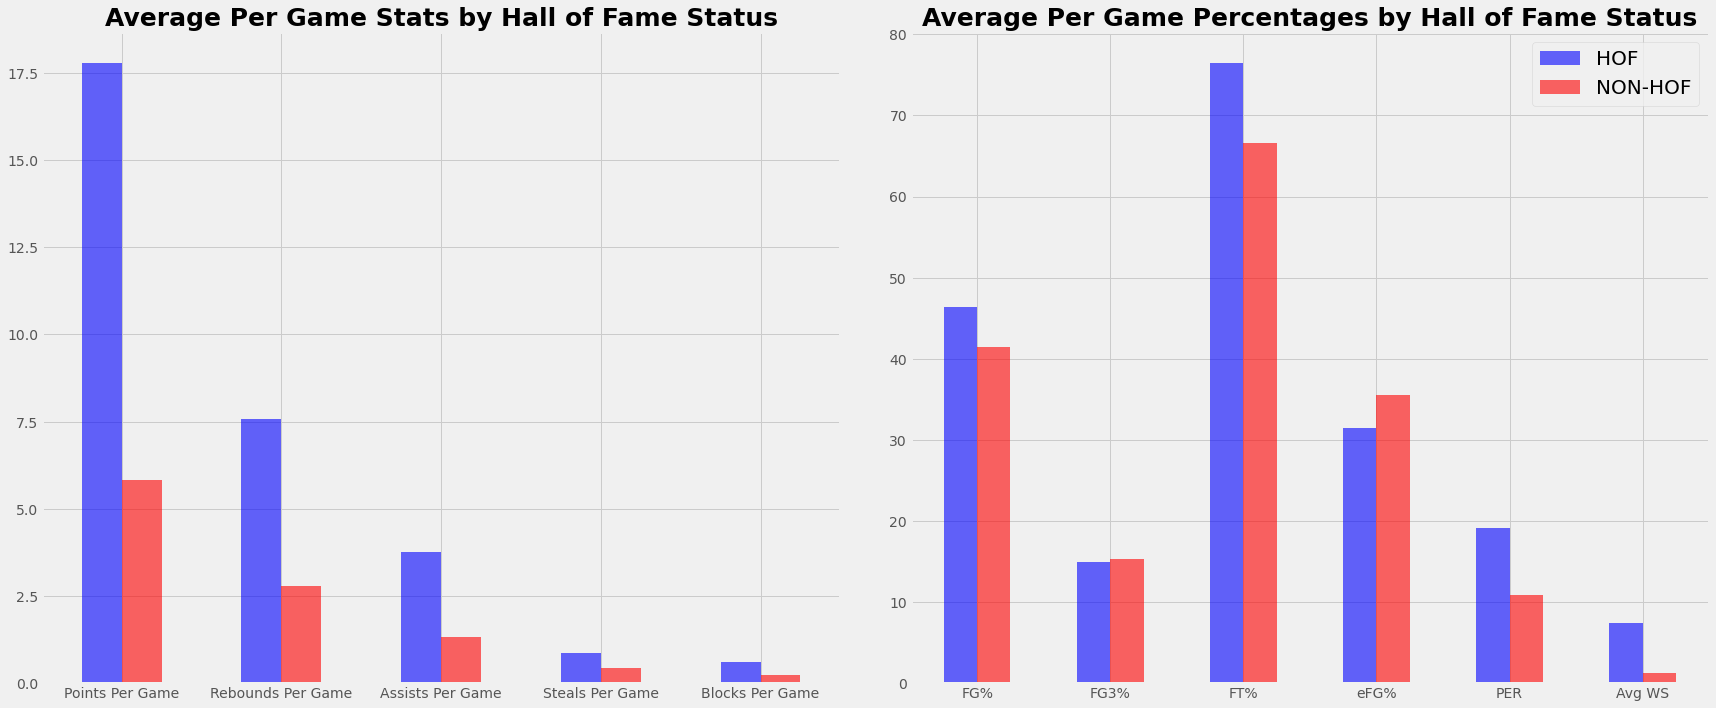

In [641]:
fig, axs = plt.subplots(1,2,figsize=(25,11))

# per game stats graph
graph_hof_basic = retired_hof_eligible.groupby('Inducted as Player')['Career PPG','Career RPG',
                                                           'Career APG','Career SPG','Career BPG']
graph_hof_basic = graph_hof_basic.mean().transpose()
graph_hof_basic = graph_hof_basic.rename({'Career PPG': 'Points Per Game', 
                                  'Career RPG': 'Rebounds Per Game', 
                                  'Career APG': 'Assists Per Game',
                                   'Career SPG': 'Steals Per Game',
                                    'Career BPG': 'Blocks Per Game'},
                                   axis='index')
graph_hof_basic = graph_hof_basic.rename({1:'HOF', 0:'NON-HOF'}, axis='columns')
graph_hof_basic[graph_hof_basic.columns[::-1]].plot(kind='bar',color={'HOF':'Blue','NON-HOF':'Red'},
                                                    rot=0, alpha=0.6, ax=axs[0])
axs[0].set_title('Average Per Game Stats by Hall of Fame Status', fontsize=25, fontweight="bold")
axs[0].legend(loc=1, frameon=True, prop={'size': 20}).remove()

# percentage graphs
graph_hof_percentage = retired_hof_eligible.groupby('Inducted as Player')['Career FG%','Career FG3%',
                                                            'Career FT%','Career eFG%', 'PER', 'Avg WS']
graph_hof_percentage = graph_hof_percentage.mean().transpose()
graph_hof_percentage = graph_hof_percentage.rename({'Career FG%': 'FG%', 
                                  'Career FG3%': 'FG3%', 
                                  'Career FT%': 'FT%',
                                   'Career eFG%': 'eFG%'},
                                   axis='index')
graph_hof_percentage = graph_hof_percentage.rename({1:'HOF', 0:'NON-HOF'}, axis='columns')
graph_hof_percentage[graph_hof_percentage.columns[::-1]].plot(kind='bar',color={'HOF':'Blue','NON-HOF':'Red'},
                                                rot=0, alpha=0.6, ax=axs[1])

axs[1].set_title('Average Per Game Percentages by Hall of Fame Status', fontsize=25, fontweight="bold")
axs[1].legend(loc=1, frameon=True, prop={'size': 20})

fig.tight_layout(pad=3.5)

plt.savefig('graphs/bar_graphs_averages.png')
plt.show()

### Scatter Plots:

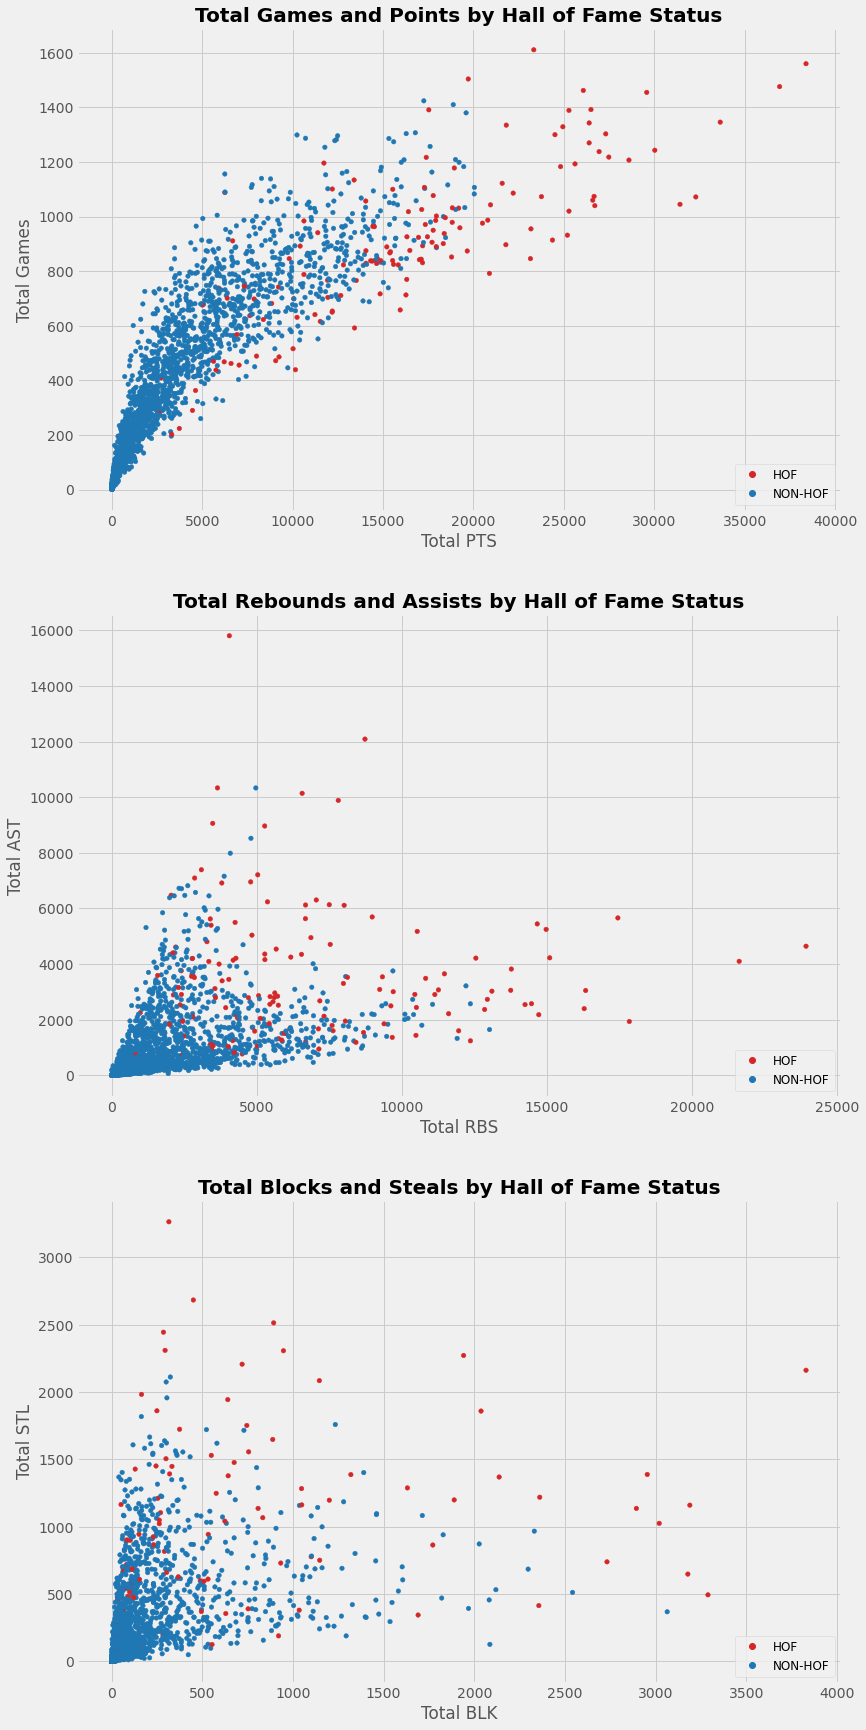

In [640]:
fig, axs = plt.subplots(3,figsize=(13,25))

hof_type = {1:'tab:red',0:'tab:blue'}

# total games and points
retired_hof_eligible.plot.scatter('Total PTS', 'Total Games', 
                    c=retired_hof_eligible['Inducted as Player'].map(hof_type), colormap='jet', ax=axs[0])

axs[0].set_title('Total Games and Points by Hall of Fame Status', fontsize=20, fontweight="bold")
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in hof_type.values()]
axs[0].legend(markers, ['HOF','NON-HOF'], prop={'size':12}, numpoints=1, loc='lower right')
# plt.savefig('graphs/hofvsnonhof_totgamesandpts.png')

# total rebounds and assists
retired_hof_eligible.plot.scatter('Total RBS', 'Total AST', 
                    c=retired_hof_eligible['Inducted as Player'].map(hof_type), colormap='jet', ax=axs[1])

axs[1].set_title('Total Rebounds and Assists by Hall of Fame Status', fontsize=20, fontweight="bold")
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in hof_type.values()]
axs[1].legend(markers, ['HOF','NON-HOF'], prop={'size':12}, numpoints=1, loc='lower right')

# total steals and blocks
retired_hof_eligible.plot.scatter('Total BLK', 'Total STL', 
                    c=retired_hof_eligible['Inducted as Player'].map(hof_type), colormap='jet', ax=axs[2])

axs[2].set_title('Total Blocks and Steals by Hall of Fame Status', fontsize=20, fontweight="bold")
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in hof_type.values()]
axs[2].legend(markers, ['HOF','NON-HOF'], prop={'size':12}, numpoints=1, loc='lower right')

fig.tight_layout(pad=3.0)

plt.savefig('graphs/scatter_plots.png')
plt.show()

Those who score more than 20,000 career points and play 1,450 games are practically guaranteed to be inducted into the Hall of Fame as a player.

Now lets look at what 'most people' consider to be the most important factors in determining future Hall of Fame chances:

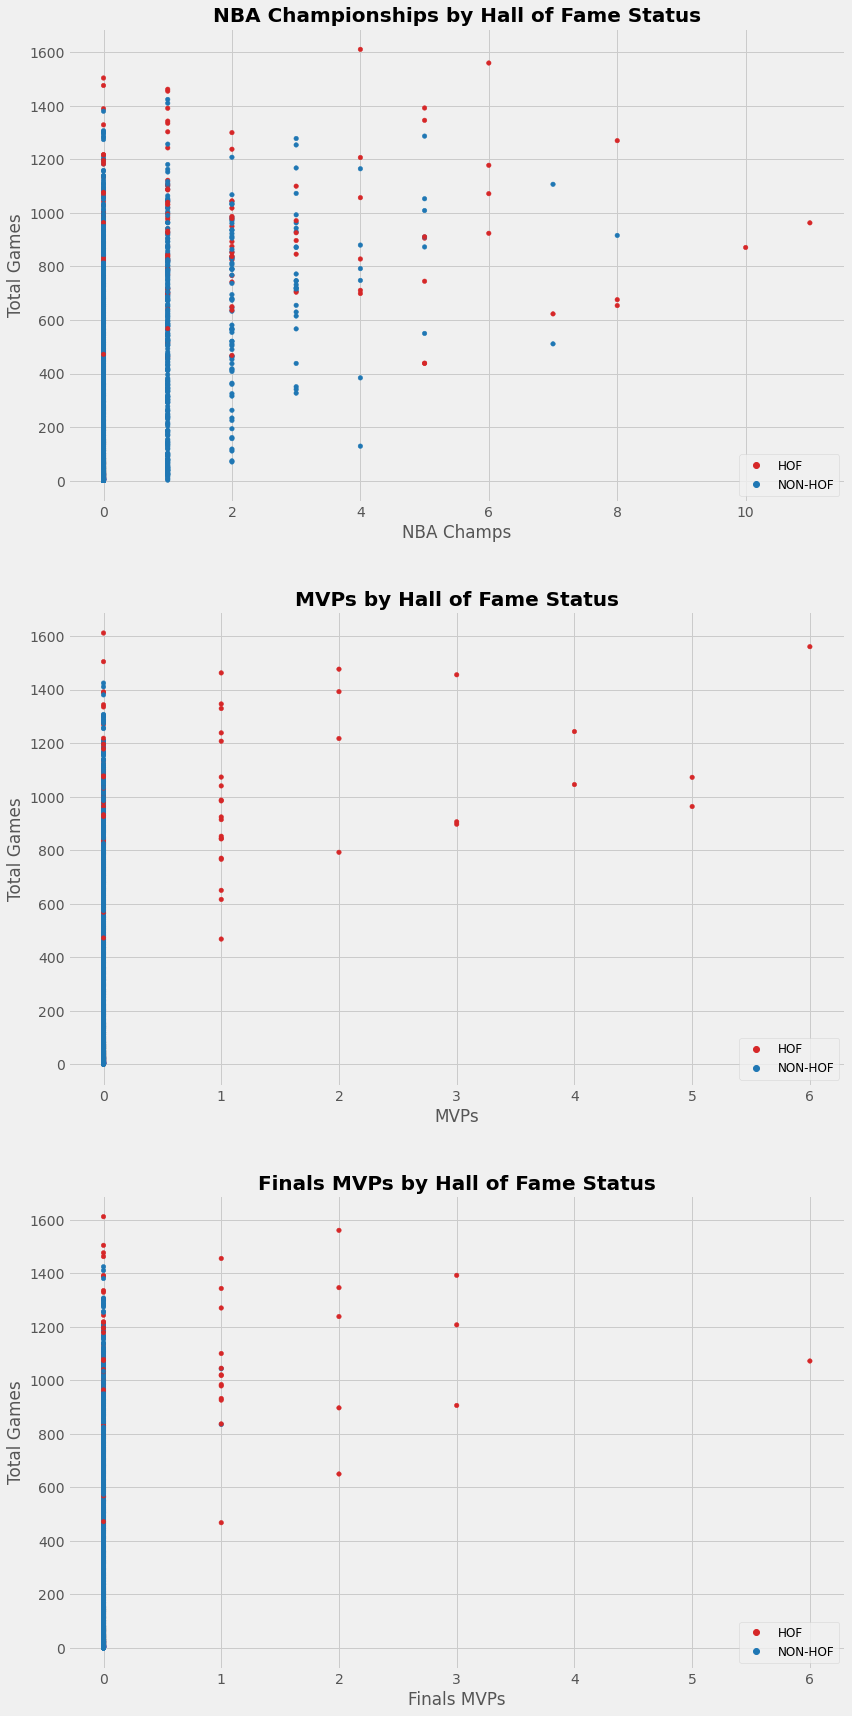

In [639]:
fig, axs = plt.subplots(3,figsize=(13,25))

hof_type = {1:'tab:red',0:'tab:blue'}
# championships
retired_hof_eligible.plot.scatter('NBA Champs', 'Total Games', 
                    c=retired_hof_eligible['Inducted as Player'].map(hof_type), colormap='jet',
                                 ax=axs[0])

axs[0].set_title('NBA Championships by Hall of Fame Status', fontsize=20, fontweight="bold")
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in hof_type.values()]
axs[0].legend(markers, ['HOF','NON-HOF'], prop={'size':12}, numpoints=1, loc='lower right')

# mvps
retired_hof_eligible.plot.scatter('MVPs', 'Total Games', 
                    c=retired_hof_eligible['Inducted as Player'].map(hof_type), colormap='jet',
                                 ax=axs[1])

axs[1].set_title('MVPs by Hall of Fame Status', fontsize=20, fontweight="bold")
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in hof_type.values()]
axs[1].legend(markers, ['HOF','NON-HOF'], prop={'size':12}, numpoints=1, loc='lower right')

# dinals mvps
retired_hof_eligible.plot.scatter('Finals MVPs', 'Total Games', 
                    c=retired_hof_eligible['Inducted as Player'].map(hof_type), colormap='jet',
                                 ax=axs[2])

axs[2].set_title('Finals MVPs by Hall of Fame Status', fontsize=20, fontweight="bold")
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in hof_type.values()]
axs[2].legend(markers, ['HOF','NON-HOF'], prop={'size':12}, numpoints=1, loc='lower right')

fig.tight_layout(pad=3.5)

plt.savefig('graphs/champs_and_mvps.png')
plt.show()

### Distribution Histograms:

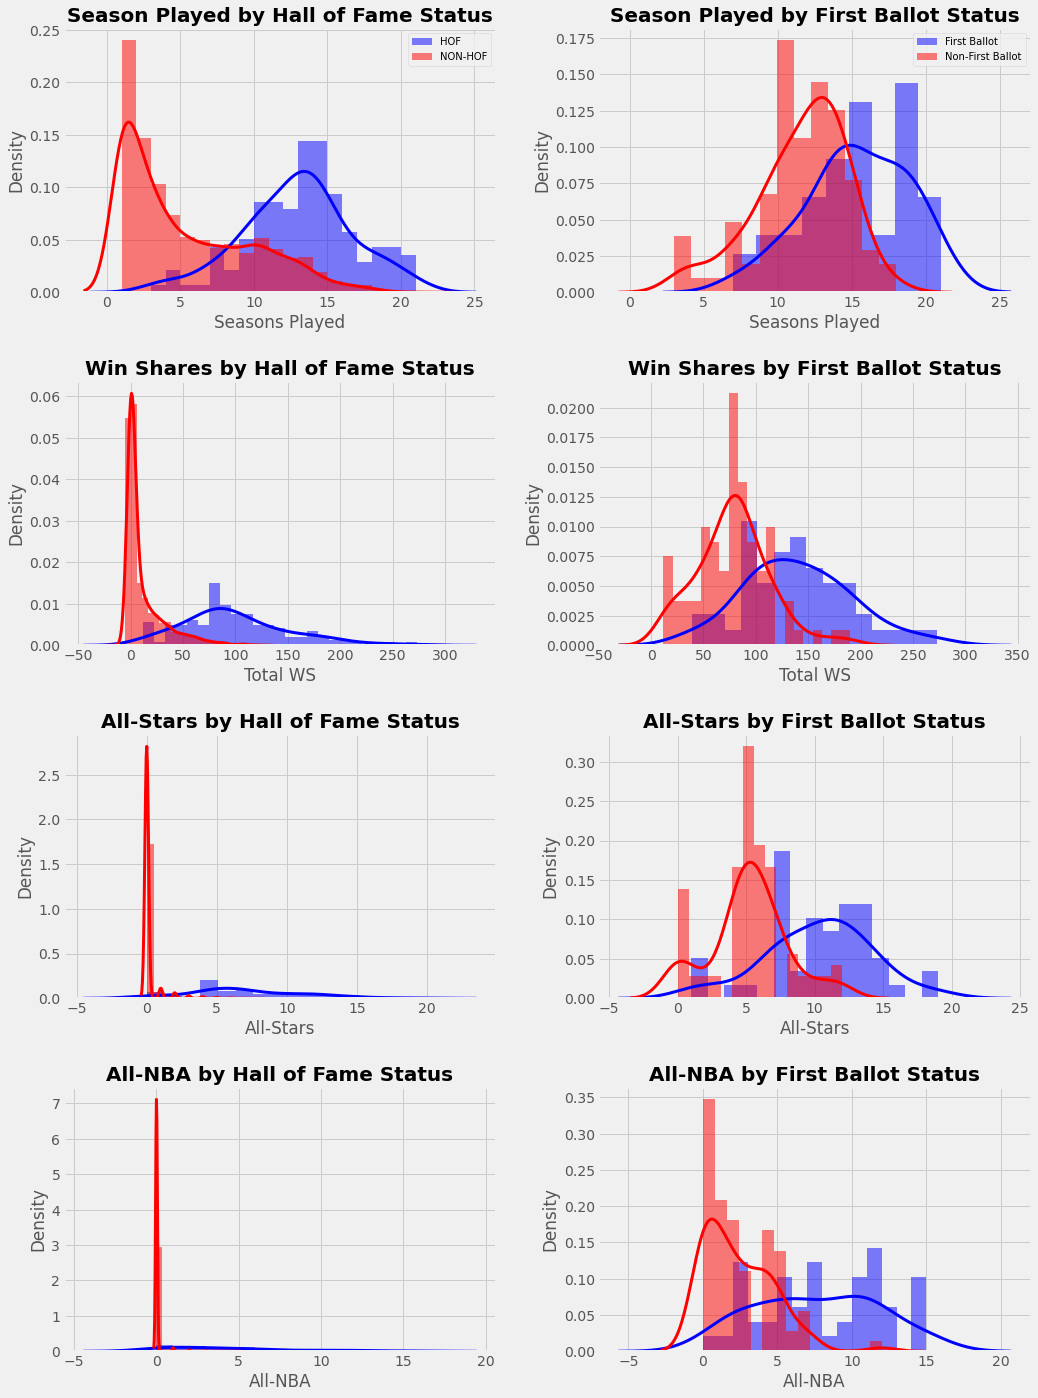

In [638]:
fig, axs = plt.subplots(4, 2, figsize=(15,20))

# distrbution plots for seasons played for retired players
sns.distplot(hof['YOE'], bins=18, label='HOF', color='Blue', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[0,0])
sns.distplot(non_hof['YOE'], bins=20, label='NON-HOF', color='Red', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[0,0])
axs[0,0].set(xlabel = 'Seasons Played')
axs[0,0].set_title('Season Played by Hall of Fame Status', fontsize=20, fontweight="bold")
axs[0,0].legend(loc=1, frameon=True, prop={'size': 10})

# distrbution plots for seasons played for retired players 
sns.distplot(hof['YOE'][hof['First Ballot'] == 1], bins=9, label='First Ballot', color='Blue', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[0,1])
sns.distplot(hof['YOE'][hof['First Ballot'] == 0], bins=13, label='Non-First Ballot', color='Red', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[0,1])
axs[0,1].set(xlabel = 'Seasons Played')
axs[0,1].set_title('Season Played by First Ballot Status', fontsize=20, fontweight="bold")
axs[0,1].legend(loc=1, frameon=True, prop={'size': 10})

# win shares for all hall of famers
sns.distplot(hof['Total WS'], bins=25, label='HOF', color='Blue', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[1,0])
sns.distplot(non_hof['Total WS'], bins=25, label='NON-HOF', color='Red', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[1,0])
axs[1,0].set(xlabel = 'Total WS')
axs[1,0].set_title('Win Shares by Hall of Fame Status', fontsize=20, fontweight="bold")

# win shares for first ballot
sns.distplot(hof['Total WS'][hof['First Ballot'] == 1], bins=15, label='HOF', color='Blue', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[1,1])
sns.distplot(hof['Total WS'][hof['First Ballot'] == 0], bins=20, label='NON-HOF', color='Red', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[1,1])
axs[1,1].set(xlabel = 'Total WS')
axs[1,1].set_title('Win Shares by First Ballot Status', fontsize=20, fontweight="bold")

# all-stars for all hall of famers
sns.distplot(hof['All-Stars'], bins=15, label='First Ballot', color='Blue', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[2,0])
sns.distplot(non_hof['All-Stars'], bins=15, label='Non-First Ballot', color='Red', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[2,0])
axs[2,0].set(xlabel = 'All-Stars')
axs[2,0].set_title('All-Stars by Hall of Fame Status', fontsize=20, fontweight="bold")

# all-stars for first ballot
sns.distplot(hof['All-Stars'][hof['First Ballot'] == 1], bins=15, label='First Ballot', color='Blue', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[2,1])
sns.distplot(hof['All-Stars'][hof['First Ballot'] == 0], bins=15, label='Non-First Ballot', color='Red', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[2,1])
axs[2,1].set(xlabel = 'All-Stars')
axs[2,1].set_title('All-Stars by First Ballot Status', fontsize=20, fontweight="bold")

# all-nbas for all hall of famers
sns.distplot(hof['All-NBA'], bins=15, label='First Ballot', color='Blue', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[3,0])
sns.distplot(non_hof['All-NBA'], bins=15, label='Non-First Ballot', color='Red', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[3,0])
axs[3,0].set(xlabel = 'All-NBA')
axs[3,0].set_title('All-NBA by Hall of Fame Status', fontsize=20, fontweight="bold")

# all-nbas for first ballot
sns.distplot(hof['All-NBA'][hof['First Ballot'] == 1], bins=15, label='First Ballot', color='Blue', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[3,1])
sns.distplot(hof['All-NBA'][hof['First Ballot'] == 0], bins=15, label='Non-First Ballot', color='Red', 
             hist_kws={'alpha':0.5}, kde_kws={'linewidth':3}, ax=axs[3,1])
axs[3,1].set(xlabel = 'All-NBA')
axs[3,1].set_title('All-NBA by First Ballot Status', fontsize=20, fontweight="bold")
fig.tight_layout(pad=2.0)

plt.savefig('graphs/dist_histograms.png')
plt.show()

### Let's check out some correlations:

We'll let the correlation matrix determine the top categorical variables to use in our models.

In [14]:
#correlation matrix #we'll also drop the retired column since it's not particularly useful
corr = retired_hof_eligible.drop(columns=['Retired']).corr()
# display(corr)

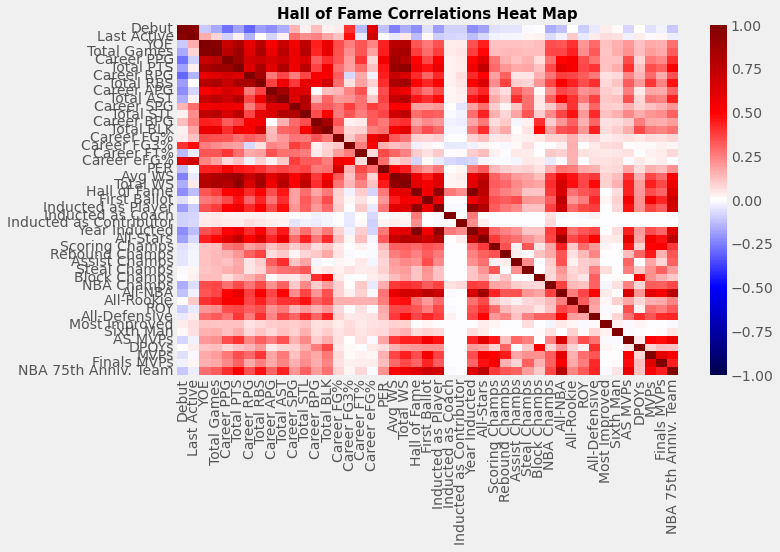

In [422]:
# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            vmin=-1, vmax=1, cmap='seismic');
plt.title('Hall of Fame Correlations Heat Map', fontsize=15, fontweight="bold")
plt.savefig('graphs/correlation_heatmap.png')
plt.show()

Since we'll want to predict future *player* hall of famers, we'll look at Hall of Famers inducted as Players and First Ballot Hall of Famers.

In [396]:
# correlation matrix for player hofs and first ballots -- these are the correlation we want!
hof_corr = retired_hof_eligible.drop(columns=['Retired','Year Inducted']).corr()[['Inducted as Player', 'First Ballot']]
display(hof_corr)

,Inducted as Player,First Ballot
Debut,-0.188099,-0.058473
Last Active,-0.099392,0.011039
YOE,0.336810,0.263660
Total Games,0.376040,0.287805
Career PPG,0.510702,0.351740
Total PTS,0.572287,0.461698
Career RPG,0.418160,0.301431
Total RBS,0.504308,0.423352
Career APG,0.355894,0.269798
Total AST,0.470632,0.406618


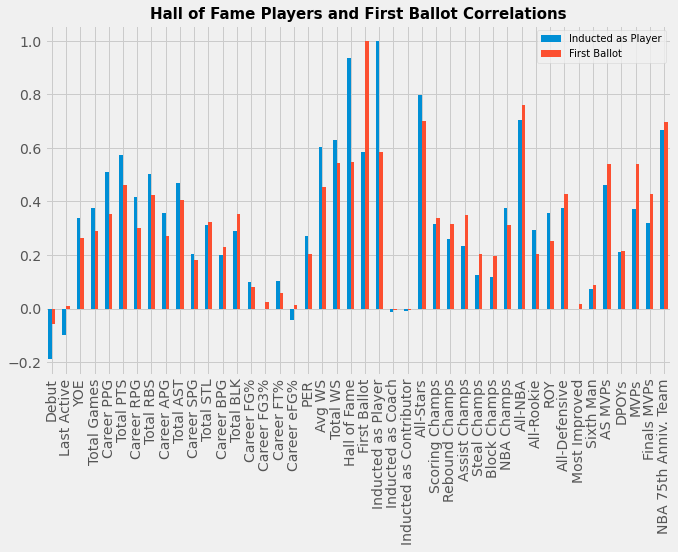

In [423]:
# hall of fame correlations for all players
hof_corr.plot.bar()
plt.title('Hall of Fame Players and First Ballot Correlations', fontsize=15, fontweight="bold")
plt.legend(prop={'size':10})
plt.savefig('graphs/hof_correlation_graph.png')
plt.show()

In [18]:
hof_corr_dict = hof_corr.to_dict()

In [19]:
hof_corr = hof_corr_dict.get('Inducted as Player')
fst_ballot_corr = hof_corr_dict.get('First Ballot')

In [20]:
# we don't want these variables since they directly correlate to hof status
remove_key = ['Hall of Fame','Inducted as Player', 'First Ballot']
[hof_corr.pop(var) for var in remove_key if var in remove_key]
[fst_ballot_corr.pop(var) for var in remove_key if var in remove_key]

[0.5474805987894811, 0.5854613154489753, 1.0]

To reduce overfitting I don't want to overload the models with too many predictive variables. So lets select all variables that have a moderate-strong positive correlation; which is anything above 0.50 (nearest 2 decimal points):

In [21]:
hof_predictive_variables = [key for key, value in hof_corr.items() if round(value, 2) >= 0.5]
fst_ballot_pred_var = [key for key, value in fst_ballot_corr.items() if round(value, 2) >= 0.5]

In [22]:
print(hof_predictive_variables, len(hof_predictive_variables))
print(fst_ballot_pred_var, len(fst_ballot_pred_var))

['Career PPG', 'Total PTS', 'Total RBS', 'Avg WS', 'Total WS', 'All-Stars', 'All-NBA', 'NBA 75th Anniv. Team'] 8
['Total WS', 'All-Stars', 'All-NBA', 'AS MVPs', 'MVPs', 'NBA 75th Anniv. Team'] 6


The most correlated variables among Hall of Famers are quite surprising.

## Analysis Methodology: Predictive Analysis

Lets go ahead and do some predictions.  <br>
I will select two models:
- as
- ad

Probabilistic Classification:

Binary Classification:

In [23]:
X, Y = retired_hof_eligible[hof_predictive_variables], retired_hof_eligible['Inducted as Player']
x, y = retired_hof_eligible[fst_ballot_pred_var], retired_hof_eligible['First Ballot']

The sample size is quite small, so there isn't much need to do a train-test split.

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Probabilistic Classification

In [25]:
logistic_reg = LogisticRegression(solver='liblinear', C=4.0, random_state=42).fit(X, Y)
y_pred = logistic_reg.predict(X)

print(metrics.classification_report(Y, y_pred)); print()
print('Accuracy:', metrics.accuracy_score(Y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(Y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y, y_pred)); print()
print(metrics.confusion_matrix(Y, y_pred)); print()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3163
           1       0.91      0.81      0.85       139

    accuracy                           0.99      3302
   macro avg       0.95      0.90      0.92      3302
weighted avg       0.99      0.99      0.99      3302


Accuracy: 0.9884918231374924
Mean Abs Error:  0.01150817686250757
Mean Squared Error:  0.01150817686250757

[[3152   11]
 [  27  112]]



In [26]:
# use platt scaling to calibrate and transform into probablity model
svm_model = svm.SVC(kernel='linear', random_state=42, probability=True).fit(X, Y)
y_pred = svm_model.predict(X)

print(metrics.classification_report(Y, y_pred)); print()
print('Accuracy:', metrics.accuracy_score(Y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(Y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y, y_pred)); print()
print(metrics.confusion_matrix(Y, y_pred)); print()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3163
           1       0.85      0.81      0.83       139

    accuracy                           0.99      3302
   macro avg       0.92      0.90      0.91      3302
weighted avg       0.99      0.99      0.99      3302


Accuracy: 0.9860690490611751
Mean Abs Error:  0.013930950938824955
Mean Squared Error:  0.013930950938824955

[[3143   20]
 [  26  113]]



In [27]:
bayes = GaussianNB().fit(X, Y)
y_pred = bayes.predict(X)

print(metrics.classification_report(Y, y_pred)); print()
print('Accuracy: ', metrics.accuracy_score(Y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(Y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y, y_pred)); print()
print(metrics.confusion_matrix(Y, y_pred)); print()

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3163
           1       0.46      0.92      0.62       139

    accuracy                           0.95      3302
   macro avg       0.73      0.94      0.80      3302
weighted avg       0.97      0.95      0.96      3302


Accuracy:  0.951847365233192
Mean Abs Error:  0.04815263476680799
Mean Squared Error:  0.04815263476680799

[[3015  148]
 [  11  128]]



### Binary Classification

In [28]:
svm_binary = svm.SVC(random_state=42).fit(x, y)
y_pred = svm_binary.predict(x)

print(classification_report(y, y_pred)); print()
print('Accuracy: ', accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3253
           1       0.83      0.59      0.69        49

    accuracy                           0.99      3302
   macro avg       0.91      0.79      0.84      3302
weighted avg       0.99      0.99      0.99      3302


Accuracy:  0.9921259842519685
Mean Abs Error:  0.007874015748031496
Mean Squared Error:  0.007874015748031496

[[3247    6]
 [  20   29]]



In [29]:
decision_tree = tree.DecisionTreeClassifier(max_depth=5, random_state=42).fit(x, y)
y_pred = decision_tree.predict(x)

print(classification_report(y, y_pred)); print()
print('Accuracy: ', accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3253
           1       0.95      0.86      0.90        49

    accuracy                           1.00      3302
   macro avg       0.98      0.93      0.95      3302
weighted avg       1.00      1.00      1.00      3302


Accuracy:  0.997274379164143
Mean Abs Error:  0.0027256208358570565
Mean Squared Error:  0.0027256208358570565

[[3251    2]
 [   7   42]]



In [30]:
rand_forest = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=8).fit(x, y)
y_pred = rand_forest.predict(x)

print(classification_report(y, y_pred)); print()
print('Accuracy: ', accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3253
           1       1.00      0.96      0.98        49

    accuracy                           1.00      3302
   macro avg       1.00      0.98      0.99      3302
weighted avg       1.00      1.00      1.00      3302


Accuracy:  0.9993943064809206
Mean Abs Error:  0.0
Mean Squared Error:  0.0006056935190793458

[[3253    0]
 [   2   47]]



In [31]:
knn = KNeighborsClassifier(n_neighbors=10).fit(x, y)
y_pred = knn.predict(x)

print(classification_report(y, y_pred)); print()
print('Accuracy: ', accuracy_score(y, y_pred))
print('Mean Abs Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred)); print()
print(confusion_matrix(y, y_pred)); print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3253
           1       0.84      0.73      0.78        49

    accuracy                           0.99      3302
   macro avg       0.92      0.87      0.89      3302
weighted avg       0.99      0.99      0.99      3302


Accuracy:  0.9939430648092066
Mean Abs Error:  0.0060569351907934586
Mean Squared Error:  0.0060569351907934586

[[3246    7]
 [  13   36]]



### Predictive Model Results

Now, we will calculate the future hall of fame status and probability for all active and recently-retired players. Since the logistic regression model had the highest accuracy rate, we will use this model - currently trained on retired players - on current and recently-retired players.

We'll look at players who either recently retired or currently playing in the league. We will try to predict, using the models we ran above, if they will be inducted into the hall of fame based on their career average statistics. One important note is that since we are including career length as a factor, this model only focuses on on career achievements up to this point; it does not take account for a player's remaining seasons left in the league.

In [651]:
# function for predicting hof probability for all nba players
def hof_prob(row):
    player = row[hof_predictive_variables]
    hof_probability = logistic_reg.predict_proba([player]);
    return hof_probability[0][1]

In [652]:
# function for predicting whether a player should be a first ballot hofer
def first_ballot(row):
    player = row[fst_ballot_pred_var]
    hof_binary = rand_forest.predict([player]);
    return hof_binary[0]

In [716]:
nba_players_hof_prob = all_nba_players
show_columns = ['Player','Debut','Last Active','YOE','Position',
                'Team', 'HOF Probability','First Ballot','Inducted as Player']

In [654]:
nba_players_hof_prob['HOF Probability'] = nba_players_hof_prob.apply(lambda row: hof_prob(row), axis=1)

In [655]:
nba_players_hof_prob['First Ballot'] = nba_players_hof_prob.apply(lambda row: first_ballot(row), axis=1)

In [656]:
nba_players_hof_prob[show_columns][nba_players_hof_prob['Hall of Fame'] == 1].to_csv('csv_files/hof_players_prob.csv', index=False)

In [657]:
nba_players_hof_prob_to_csv = nba_players_hof_prob[show_columns]

In [658]:
nba_players_hof_prob_to_csv.to_csv('csv_files/nba_players_hof_prob.csv', index=False)

In [659]:
nba_players_hof_prob = nba_players_hof_prob.dropna()

In [660]:
nba_players_hof_prob.to_csv('csv_files/nba_players_hof_prob_with_stats.csv', index=False)

In [661]:
nba_players_hof_prob = pd.read_csv('csv_files/nba_players_hof_prob_with_stats.csv')

In [717]:
# first ballot hall of famers not predicted to be first ballot
display(hof_prob[show_columns][(hof_prob['Hall of Fame'] == 1) &
                                   (hof_prob['First Ballot'] == 0) &
                                    (hof_prob['Player'].isin(list(first_ballot_hofs.First_Ballot)))].head())

# current hall of famers who were not predicted to be in the hall of fame
display(hof_prob[show_columns][(hof_prob['HOF Probability'] <= 0.5) &
                                   (hof_prob['Hall of Fame'] == 1) &
                                    (hof_prob['Inducted as Player'] == 1)].head(50))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player
3086,Andy Phillip,1947,1958,11,PG,DET,0.602777,0,1
424,Bill Bradley,1967,1977,10,SF,NYK,0.020511,0,1


,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player
1394,Tom Gola,1955,1966,10,SG,GSW,0.481565,0,1
4057,Bill Walton,1974,1987,10,C,POR,0.436238,1,1
2361,Clyde Lovellette,1953,1964,11,C,LAL,0.429367,0,1
444,Carl Braun,1947,1962,13,PG,NYK,0.427685,0,1
1400,Gail Goodrich,1965,1979,14,SG,LAL,0.342666,0,1
864,Bob Dandridge,1969,1982,13,SF,MIL,0.317772,0,1
3298,Arnie Risen,1948,1958,10,C,SAC,0.273918,0,1
681,Maurice Cheeks,1978,1993,15,PG,PHI,0.238443,0,1
3475,Charlie Scott,1970,1980,10,SG,PHO,0.200731,0,1
1285,Joe Fulks,1946,1954,8,PF,GSW,0.198184,0,1


In [720]:
# check all coaches or contributors who aren't predicted to be hof (as player)
display(hof_prob[['Player','Debut','Last Active','YOE','Position',
                'Team', 'HOF Probability','First Ballot','Inducted as Player',
                            'Inducted as Coach', 'Inducted as Contributor']][(hof_prob['First Ballot'] == 0) &
                                          (hof_prob['Year Inducted'] <= 2022) &
                                          (hof_prob['Hall of Fame'] == 1) &
                                          (hof_prob['Retired'] == 1) &
                                          (hof_prob['Inducted as Coach'] == 1) |
                                          (hof_prob['Inducted as Contributor'] == 1)].head(50))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player,Inducted as Coach,Inducted as Contributor
796,Larry Costello,1954,1968,12,PG,PHI,0.548493,0,0,0,1
3894,Rudy Tomjanovich,1970,1981,11,PF,HOU,0.467666,0,0,1,0
1131,Wayne Embry,1958,1969,11,C,SAC,0.136032,0,0,0,1
3592,Jerry Sloan,1965,1976,11,SG,CHI,0.044854,0,0,1,0
2834,Don Nelson,1962,1976,14,SF,BOS,0.013888,0,0,1,0
206,Don Barksdale,1951,1955,4,PF,BLB,0.011911,0,0,0,1
3429,Tom Sanders,1960,1973,13,SF,BOS,0.009617,0,0,0,1
148,Al Attles,1960,1971,11,PG,GSW,0.007253,0,0,0,1
722,Nat Clifton,1950,1958,8,PF,NYK,0.006921,0,0,0,1
3872,Rod Thorn,1963,1971,8,SG,OKC,0.004262,0,0,0,1


In [704]:
first_ballot_hofs = pd.read_csv('csv_files/first_ballot_hofs.csv')
last_active = 2019; year_inducted = last_active+4

# predict 2023 hall of fame inductees
hof_prob = nba_players_hof_prob.sort_values(by='HOF Probability', ascending=False)

# get all retired players
retired_non_hof = hof_prob[(hof_prob['Last Active'] <= last_active) &
                                    (hof_prob['Retired'] == 1) &
                                  (hof_prob['Hall of Fame'] == 0) |
                                 (hof_prob['Year Inducted'] == year_inducted) &
                                 (hof_prob['Hall of Fame'] == 1)]

In [705]:
# lets grab the only columns we need
retired_non_hof = retired_non_hof[show_columns]
# hof_players_prob = hof_prob[['Player','Debut','Last Active','YOE','Position',
#             'Team', 'HOF Probability','First Ballot','Year Inducted','Inducted as Player']]

display(retired_non_hof.head(15))

# check if model predicted previous hof inductees
display(retired_non_hof[retired_non_hof['First Ballot'] == 1])

# show 2018 (previous year) hof inductees
# display(hof_players_prob[(hof_players_prob['Year Inducted'] == year_inducted) &
#                         (hof_players_prob['Inducted as Player'] == 1)])

first_ballot_retired = retired_non_hof.reset_index().index[retired_non_hof['First Ballot'] == 1].tolist()

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player
2889,Dirk Nowitzki,1998,2019,21,PF,DAL,0.999995,1,0
4015,Dwyane Wade,2003,2019,16,SG,MIA,0.999961,1,0
1502,Alex Groza,1949,1951,2,NaN,INO,0.999940,0,0
1254,Larry Foust,1950,1962,12,C,DET,0.932625,0,0
3739,Amar'e Stoudemire,2002,2016,14,PF,PHO,0.912641,0,0
879,Brad Daugherty,1986,1994,8,C,CLE,0.892315,0,0
1986,Marques Johnson,1977,1990,11,SF,MIL,0.857740,0,0
1337,Pau Gasol,2001,2019,18,C,MEM,0.834888,0,0
1980,Kevin Johnson,1987,2000,12,PG,PHO,0.820470,0,0
2100,Shawn Kemp,1989,2003,14,PF,OKC,0.793504,0,0


,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player
2889,Dirk Nowitzki,1998,2019,21,PF,DAL,0.999995,1,0
4015,Dwyane Wade,2003,2019,16,SG,MIA,0.999961,1,0


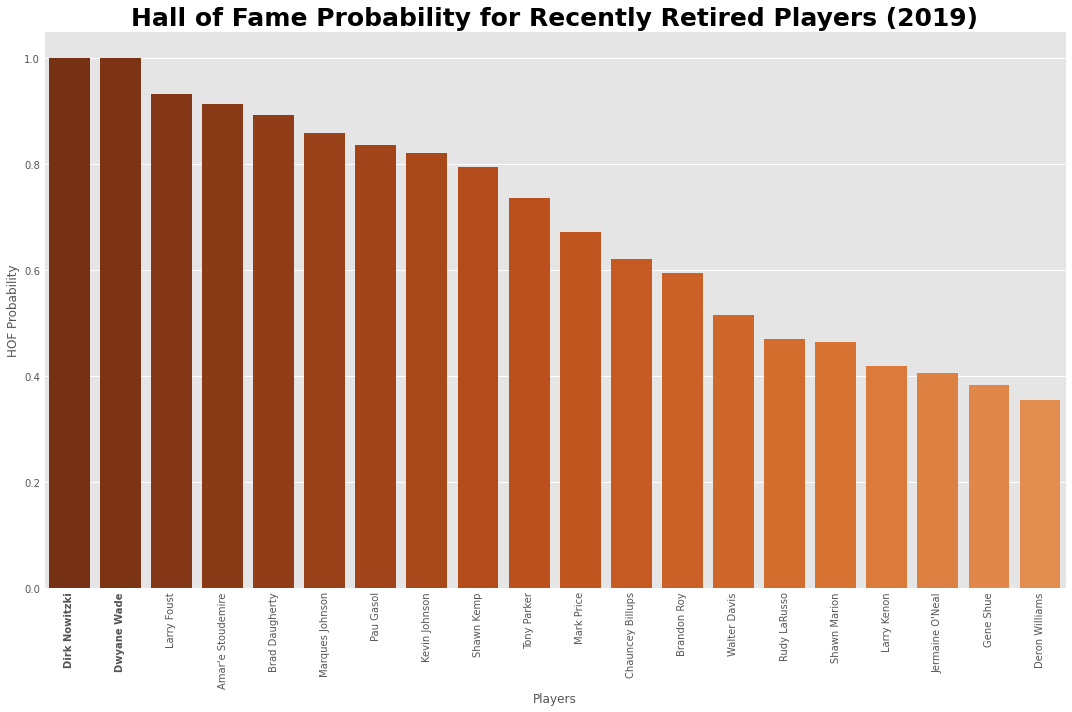

In [665]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=retired_non_hof[:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(retired_non_hof['Player'][:20], rotation=90)
for player in first_ballot_retired: ax.get_xticklabels()[player].set_weight('bold')
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Recently Retired Players (2019)', fontsize=25, fontweight='bold')
plt.tight_layout()

plt.savefig('graphs/2023_hof_prob.png')
plt.show()

In [666]:
# predict active inductees
active_players = nba_players_hof_prob.sort_values(by='HOF Probability', ascending=False)

# get all retired players
active_players = active_players[(active_players['Last Active'] == 2022) |
                               (active_players['Retired'] == 0)]

In [667]:
# show top active players hof probability chances, and which are current locks
display(active_players[show_columns].head(50))
print(active_players.shape)
first_ballot_active = active_players.reset_index().index[active_players['First Ballot'] == 1].tolist()

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player
1806,LeBron James,2003,2022,19,SF,CLE,1.000000,1,0
1012,Kevin Durant,2007,2022,14,SF,OKC,0.999995,1,0
2885,Chris Paul,2005,2022,17,PG,NOP,0.999994,1,0
1496,James Harden,2009,2022,13,SG,HOU,0.999974,1,0
3937,Russell Westbrook,2008,2022,14,PG,OKC,0.999816,1,0
818,Stephen Curry,2009,2022,13,PG,GSW,0.999701,1,0
842,Anthony Davis,2012,2022,10,PF,NOP,0.999425,0,0
107,Giannis Antetokounmpo,2013,2022,9,PF,MIL,0.999361,0,0
2213,Damian Lillard,2012,2022,10,PG,POR,0.999359,0,0
110,Carmelo Anthony,2003,2022,19,SF,DEN,0.997601,1,0


(845, 50)


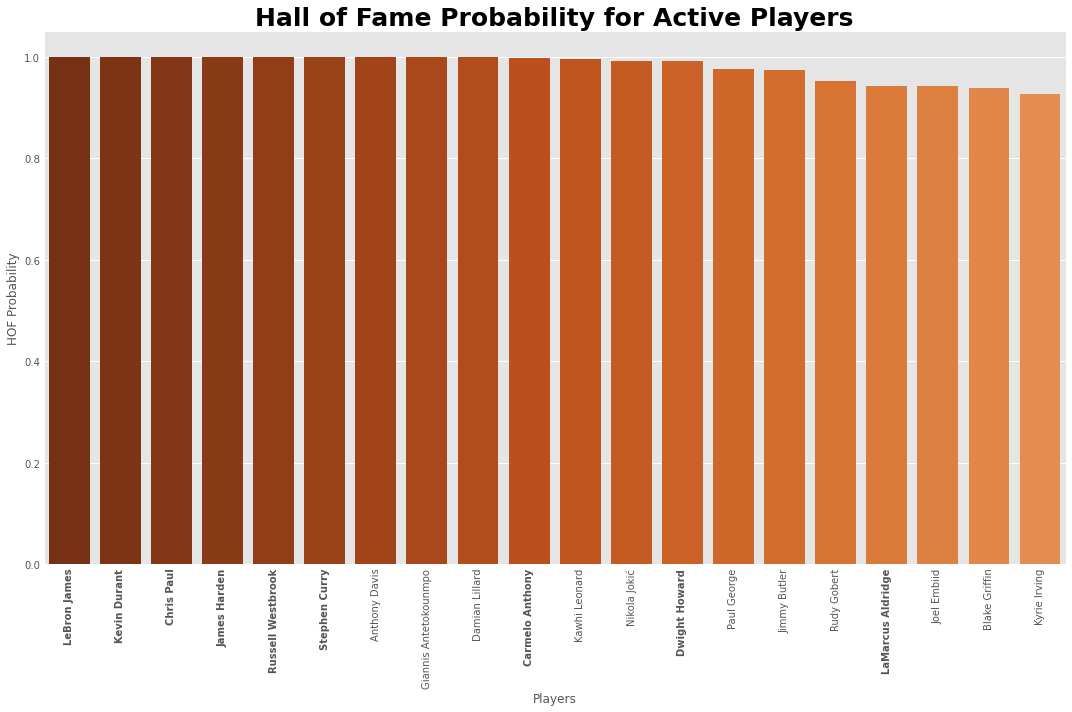

In [668]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=active_players[:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(active_players['Player'][:20], rotation=90)
for player in first_ballot_active: ax.get_xticklabels()[player].set_weight('bold')
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Active Players', fontsize=25, fontweight='bold')
plt.tight_layout()

plt.savefig('graphs/active_players_hof_prob.png')
plt.show()

In [669]:
# check which current players in NBA 75th anniv. team are hof locks
display(active_players[show_columns][active_players['NBA 75th Anniv. Team'] == 1].head(20))
print(active_players[show_columns][active_players['NBA 75th Anniv. Team'] == 1].shape)

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player
1806,LeBron James,2003,2022,19,SF,CLE,1.000000,1,0
1012,Kevin Durant,2007,2022,14,SF,OKC,0.999995,1,0
2885,Chris Paul,2005,2022,17,PG,NOP,0.999994,1,0
1496,James Harden,2009,2022,13,SG,HOU,0.999974,1,0
3937,Russell Westbrook,2008,2022,14,PG,OKC,0.999816,1,0
818,Stephen Curry,2009,2022,13,PG,GSW,0.999701,1,0
842,Anthony Davis,2012,2022,10,PF,NOP,0.999425,0,0
107,Giannis Antetokounmpo,2013,2022,9,PF,MIL,0.999361,0,0
2213,Damian Lillard,2012,2022,10,PG,POR,0.999359,0,0
110,Carmelo Anthony,2003,2022,19,SF,DEN,0.997601,1,0


(11, 9)


In [670]:
# check for active players who are predicted to be first ballot hall of famers
display(active_players[show_columns][active_players['First Ballot'] == 1])
print(active_players[show_columns][active_players['First Ballot'] == 1].shape)

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player
1806,LeBron James,2003,2022,19,SF,CLE,1.000000,1,0
1012,Kevin Durant,2007,2022,14,SF,OKC,0.999995,1,0
2885,Chris Paul,2005,2022,17,PG,NOP,0.999994,1,0
1496,James Harden,2009,2022,13,SG,HOU,0.999974,1,0
3937,Russell Westbrook,2008,2022,14,PG,OKC,0.999816,1,0
818,Stephen Curry,2009,2022,13,PG,GSW,0.999701,1,0
110,Carmelo Anthony,2003,2022,19,SF,DEN,0.997601,1,0
1697,Dwight Howard,2004,2022,18,C,ORL,0.991033,1,0
41,LaMarcus Aldridge,2006,2022,16,PF,POR,0.943075,1,0


(9, 9)


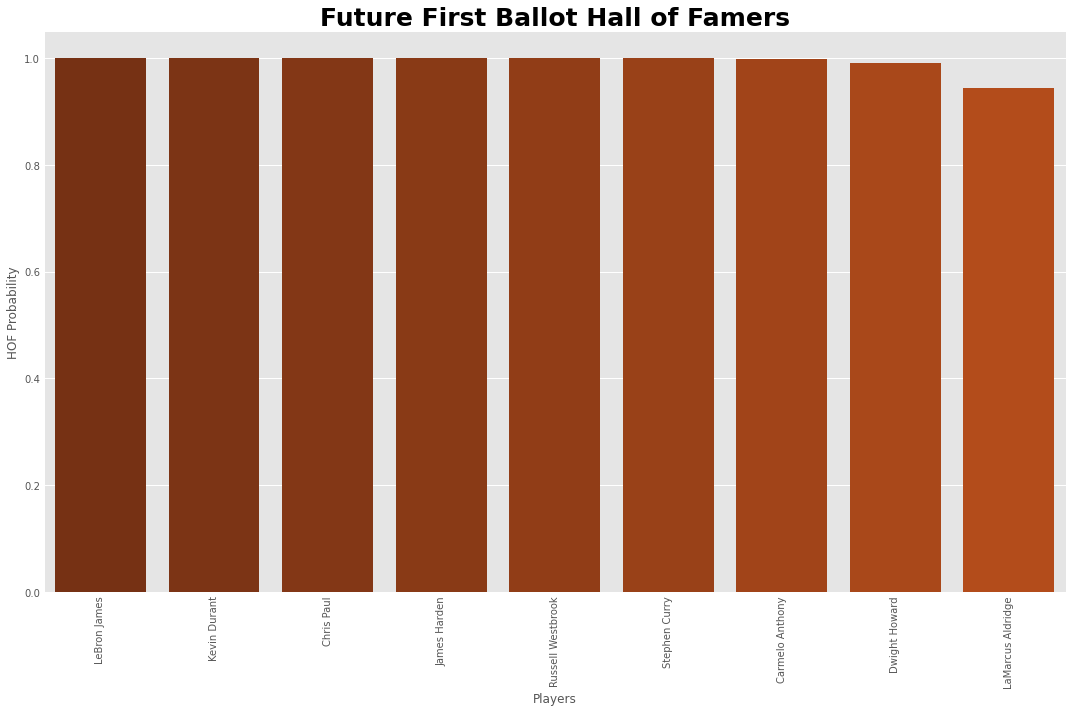

In [714]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=active_players[active_players['First Ballot'] == 1], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(active_players['Player'][active_players['First Ballot'] == 1], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Future First Ballot Hall of Famers', fontsize=25, fontweight='bold')
plt.tight_layout()

plt.savefig('graphs/active_1stballot_hof_prob.png')
plt.show()

In [671]:
# check for active players who aren't predicted to be hof locks (first ballot), but soon to be hofs
display(active_players[show_columns][active_players['First Ballot'] == 0].head(25))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player
842,Anthony Davis,2012,2022,10,PF,NOP,0.999425,0,0
107,Giannis Antetokounmpo,2013,2022,9,PF,MIL,0.999361,0,0
2213,Damian Lillard,2012,2022,10,PG,POR,0.999359,0,0
2189,Kawhi Leonard,2011,2021,10,SF,SAS,0.996493,0,0
1913,Nikola Jokić,2015,2022,7,C,DEN,0.992549,0,0
1285,Paul George,2010,2022,12,SF,IND,0.976330,0,0
548,Jimmy Butler,2011,2022,11,SG,CHI,0.973683,0,0
1322,Rudy Gobert,2013,2022,9,C,UTA,0.952241,0,0
1075,Joel Embiid,2016,2022,6,C,PHI,0.942784,0,0
1416,Blake Griffin,2010,2022,12,PF,LAC,0.938689,0,0


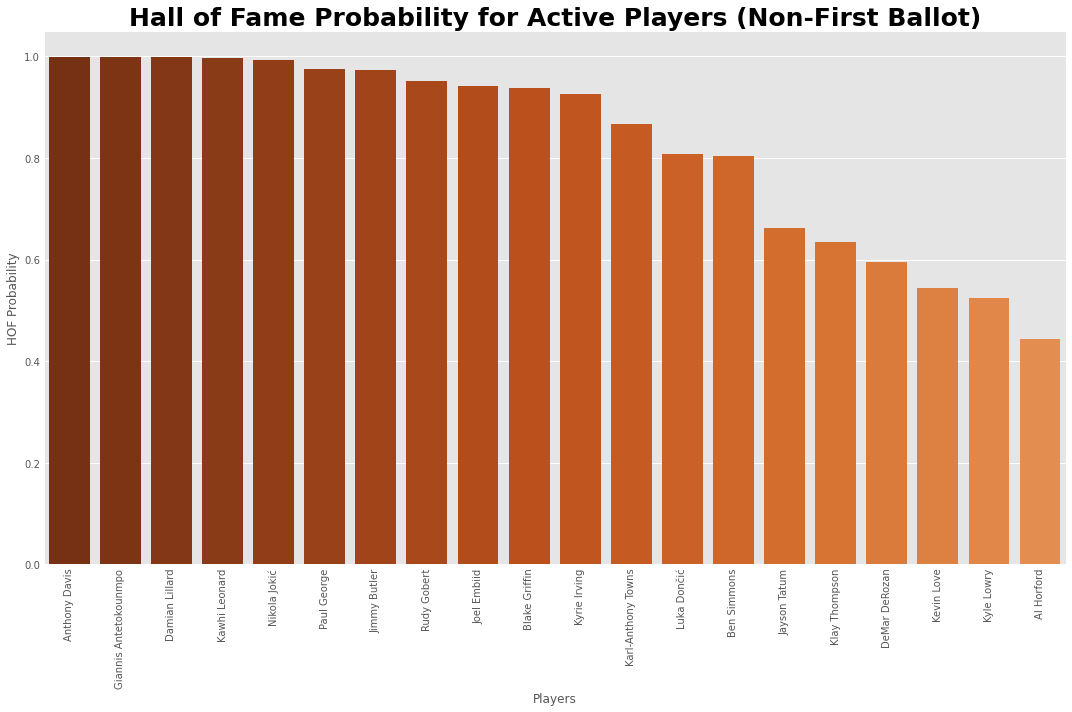

In [672]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=active_players[active_players['First Ballot'] == 0][:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(active_players[active_players['First Ballot'] == 0]['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Active Players (Non-First Ballot)', fontsize=25, fontweight='bold')
plt.tight_layout()

# plt.savefig('graphs/2023_hof_prob.png')
plt.show()

In [673]:
active_players[['Player','Debut','Last Active','YOE','Position',
                'Team', 'HOF Probability','First Ballot']].to_csv('csv_files/active_players_hof_prob', index=False)

In [674]:
# check for active players who are predicted to be hof locks
display(active_players[['Player','Debut','Last Active','YOE','Position',
                'Team', 'HOF Probability','First Ballot']][active_players['Debut'] >= 2019].head(20))
print(active_players[['Player','Debut','Last Active','YOE','Position',
                'Team', 'HOF Probability','First Ballot']][active_players['Debut'] >= 2019].shape)

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot
204,Scottie Barnes,2021,2022,1,PF,TOR,0.247650,0
4070,Zion Williamson,2019,2021,2,PF,NOP,0.131056,0
2577,Evan Mobley,2021,2022,1,PF,CLE,0.081835,0
183,Desmond Bane,2020,2022,2,SG,MEM,0.077927,0
1454,Tyrese Haliburton,2020,2022,2,PG,SAC,0.077549,0
2609,Ja Morant,2019,2022,3,PG,MEM,0.070676,0
675,Brandon Clarke,2019,2022,3,PF,MEM,0.069643,0
179,LaMelo Ball,2020,2022,2,PG,CHO,0.065287,0
1939,Herbert Jones,2021,2022,1,PF,NOP,0.062515,0
2380,Tyrese Maxey,2020,2022,2,SG,PHI,0.044920,0


(335, 8)


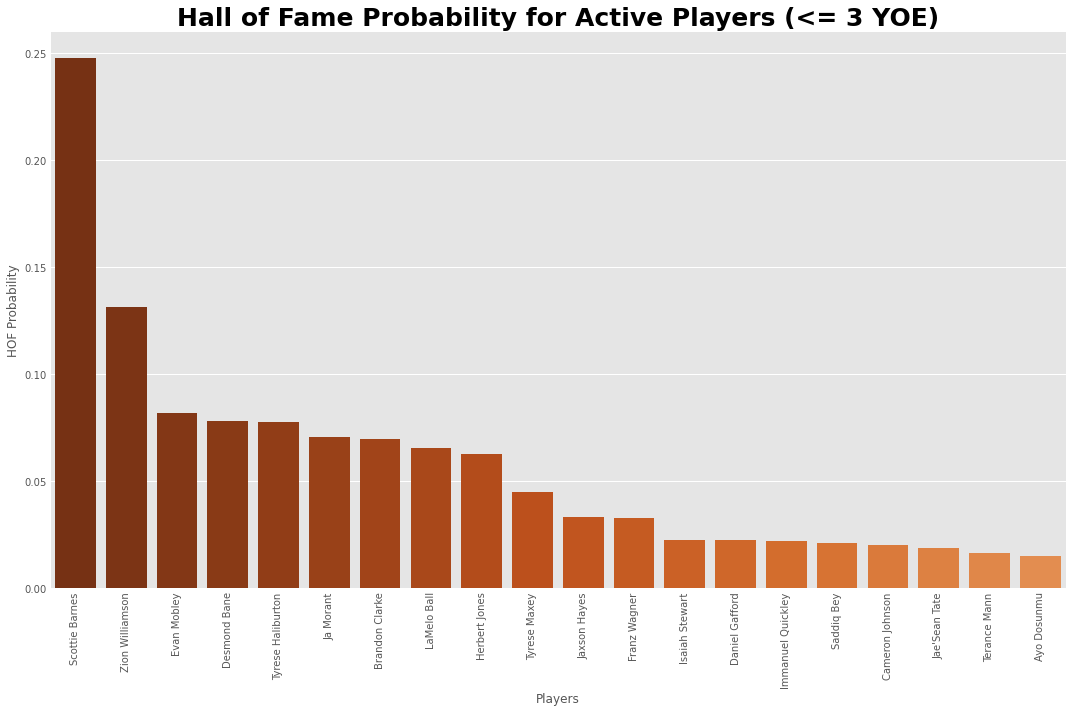

In [675]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', data=active_players[active_players['Debut'] >= 2019][:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(active_players[active_players['Debut'] >= 2019]['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Active Players (<= 3 YOE)', fontsize=25, fontweight='bold')
plt.tight_layout()

plt.savefig('graphs/non_eligible_hof_prob.png')
plt.show()

In [676]:
add_cols = ['Hall of Fame', 'Year Inducted']
for col in add_cols: show_columns.append(col)

In [677]:
# show players with highest hall of fame chances (retired and active)
nba_players_hof_prob = nba_players_hof_prob.sort_values(by='HOF Probability', ascending=False)
display(nba_players_hof_prob[show_columns].head(50))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player,Hall of Fame,Year Inducted
1806,LeBron James,2003,2022,19,SF,CLE,1.000000,1,0,0,0
2,Kareem Abdul-Jabbar,1969,1989,20,C,LAL,1.000000,1,1,1,1995
634,Wilt Chamberlain,1959,1973,14,C,GSW,1.000000,1,1,1,1979
502,Kobe Bryant,1996,2016,20,SG,LAL,1.000000,1,1,1,2020
1972,Michael Jordan,1984,2003,15,SG,CHI,1.000000,1,1,1,2009
1005,Tim Duncan,1997,2016,19,C,SAS,1.000000,1,1,1,2020
3934,Jerry West,1960,1974,14,PG,LAL,1.000000,1,1,1,1980
2308,Karl Malone,1985,2004,19,PF,UTA,0.999999,1,1,1,2010
3148,Oscar Robertson,1960,1974,14,PG,SAC,0.999999,1,1,1,1980
3232,Bill Russell,1956,1969,13,C,BOS,0.999999,1,1,1,1975


In [678]:
# check for retired players who aren't predicted to be hof locks (first ballot), but soon to be hofs
display(nba_players_hof_prob[show_columns][(nba_players_hof_prob['First Ballot'] == 0) &
                                          (nba_players_hof_prob['Hall of Fame'] == 0) &
                                          (nba_players_hof_prob['Retired'] == 1)].head(25))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player,Hall of Fame,Year Inducted
1191,Larry Foust,1950,1962,12,C,DET,0.932625,0,0,0,0
3548,Amar'e Stoudemire,2002,2016,14,PF,PHO,0.912641,0,0,0,0
837,Brad Daugherty,1986,1994,8,C,CLE,0.892315,0,0,0,0
1892,Marques Johnson,1977,1990,11,SF,MIL,0.857740,0,0,0,0
1273,Pau Gasol,2001,2019,18,C,MEM,0.834888,0,0,0,0
1886,Kevin Johnson,1987,2000,12,PG,PHO,0.820470,0,0,0,0
2004,Shawn Kemp,1989,2003,14,PF,OKC,0.793504,0,0,0,0
2868,Tony Parker,2001,2019,18,PG,SAS,0.736027,0,0,0,0
3008,Mark Price,1986,1998,12,PG,CLE,0.671073,0,0,0,0
298,Chauncey Billups,1997,2014,17,PG,DET,0.620507,0,0,0,0


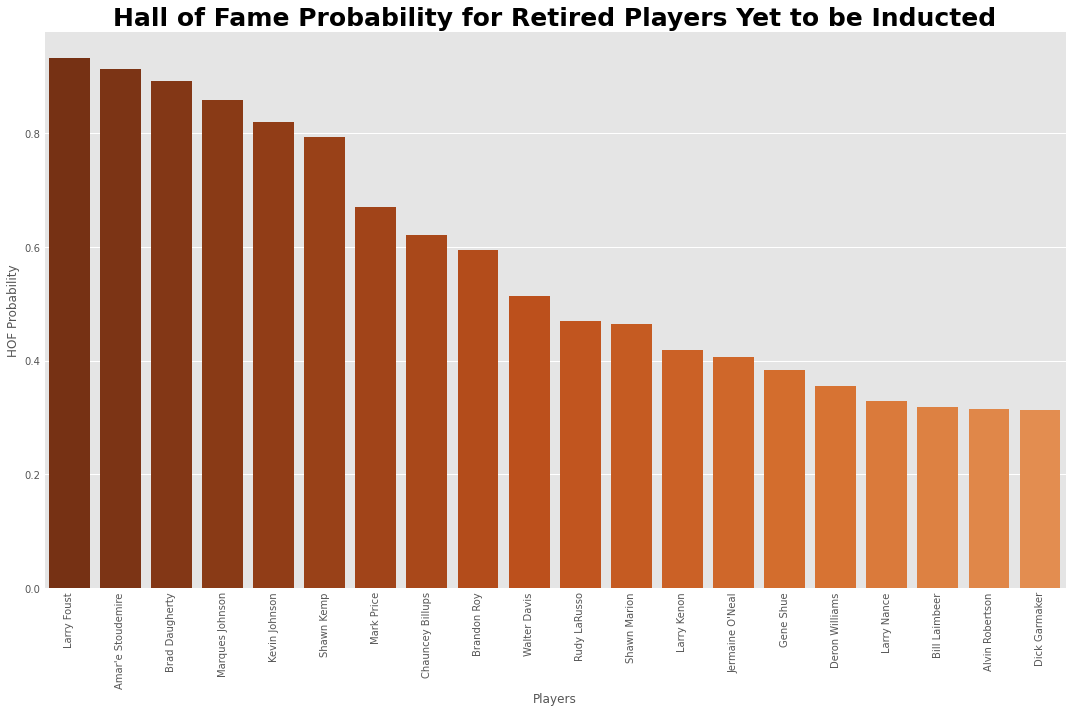

In [679]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', 
                 data=nba_players_hof_prob[(nba_players_hof_prob['Hall of Fame'] == 0) &
                                          (nba_players_hof_prob['Retired'] == 1) &
                                          (nba_players_hof_prob['Last Active'] < 2019)][:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(nba_players_hof_prob[(nba_players_hof_prob['Hall of Fame'] == 0) &
                                       (nba_players_hof_prob['Retired'] == 1) &
                                       (nba_players_hof_prob['Last Active'] < 2019)]['Player'][:20], rotation=90)
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for Retired Players Yet to be Inducted', fontsize=25, fontweight='bold')
plt.tight_layout()

plt.savefig('graphs/retired_noninducted_hof_prob.png')
plt.show()

In [680]:
# check current predicted hofs who have lowest probability
display(nba_players_hof_prob[show_columns][(nba_players_hof_prob['Hall of Fame'] == 1) &
                                          (nba_players_hof_prob['HOF Probability'] <= 0.5)].head(50))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player,Hall of Fame,Year Inducted
1324,Tom Gola,1955,1966,10,SG,GSW,0.481565,0,1,1,1976
3699,Rudy Tomjanovich,1970,1981,11,PF,HOU,0.467666,0,0,1,2020
3854,Bill Walton,1974,1987,10,C,POR,0.436238,1,1,1,1993
2252,Clyde Lovellette,1953,1964,11,C,LAL,0.429367,0,1,1,1988
419,Carl Braun,1947,1962,13,PG,NYK,0.427685,0,1,1,2019
1330,Gail Goodrich,1965,1979,14,SG,LAL,0.342666,0,1,1,1996
824,Bob Dandridge,1969,1982,13,SF,MIL,0.317772,0,1,1,2021
3132,Arnie Risen,1948,1958,10,C,SAC,0.273918,0,1,1,1998
649,Maurice Cheeks,1978,1993,15,PG,PHI,0.238443,0,1,1,2018
3301,Charlie Scott,1970,1980,10,SG,PHO,0.200731,0,1,1,2018


In [681]:
# check which current retired players are hof locks
display(nba_players_hof_prob[show_columns][(nba_players_hof_prob['First Ballot'] == 1) &
                                          (nba_players_hof_prob['Last Active'] < 2022) &
                                          (nba_players_hof_prob['Hall of Fame'] == 0) &
                                          (nba_players_hof_prob['Retired'] == 1)].head(50))

,Player,Debut,Last Active,YOE,Position,Team,HOF Probability,First Ballot,Inducted as Player,Hall of Fame,Year Inducted
2757,Dirk Nowitzki,1998,2019,21,PF,DAL,0.999995,1,0,0,0
3816,Dwyane Wade,2003,2019,16,SG,MIA,0.999961,1,0,0,0
609,Vince Carter,1998,2020,22,SG,TOR,0.603518,1,0,0,0


In [682]:
# predict hof locks and future hall of famers based on probability
all_retired = nba_players_hof_prob[(nba_players_hof_prob['Hall of Fame'] == 0)
                                            & (nba_players_hof_prob['Retired'] == 1) &
                                            (nba_players_hof_prob['Last Active'] < 2022)]
display(all_retired.head(20))

retired_first_ballot = all_retired.reset_index().index[all_retired['First Ballot'] == 1].tolist()

,Player,Debut,Last Active,YOE,Retired,Position,Team,Total Games,Career PPG,Total PTS,Career RPG,Total RBS,Career APG,Total AST,Career SPG,Total STL,Career BPG,Total BLK,Career FG%,Career FG3%,Career FT%,Career eFG%,PER,Avg WS,Total WS,Hall of Fame,First Ballot,Inducted as Player,Inducted as Coach,Inducted as Contributor,Year Inducted,All-Stars,Scoring Champs,Rebound Champs,Assist Champs,Steal Champs,Block Champs,NBA Champs,All-NBA,All-Rookie,ROY,All-Defensive,Most Improved,Sixth Man,AS MVPs,DPOYs,MVPs,Finals MVPs,NBA 75th Anniv. Team,HOF Probability
2757,Dirk Nowitzki,1998,2019,21,1,PF,DAL,1522,20.7,31560,7.5,11489,2.4,3651,0.8,1210,0.8,1281,47.1,38.0,87.9,51.2,22.4,9.8,206.3,0,1,0,0,0,0,14,0,0,0,0,0,1,12,0,0,0,0,0,0,0,1,1,1,0.999995
3816,Dwyane Wade,2003,2019,16,1,SG,MIA,1054,22.0,23165,4.7,4933,5.4,5701,1.5,1620,0.8,885,48.0,29.3,76.5,49.5,23.5,7.5,120.7,0,1,0,0,0,0,13,1,0,0,0,0,3,8,1,0,3,0,0,1,0,0,1,1,0.999961
1191,Larry Foust,1950,1962,12,1,C,DET,817,13.7,11198,9.8,8041,1.7,1368,0.0,0,0.0,0,40.5,0.0,74.1,0.0,19.8,6.6,79.2,0,0,0,0,0,0,8,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0.932625
3548,Amar'e Stoudemire,2002,2016,14,1,PF,PHO,846,18.9,15994,7.8,6632,1.2,1050,0.8,636,1.2,1054,53.7,23.6,76.1,53.8,21.8,6.6,92.5,0,0,0,0,0,0,6,0,0,0,0,0,0,5,1,1,0,0,0,0,0,0,0,0,0.912641
837,Brad Daugherty,1986,1994,8,1,C,CLE,548,19.0,10389,9.5,5227,3.7,2028,0.8,422,0.7,397,53.2,14.3,74.7,53.2,18.9,8.2,65.2,0,0,0,0,0,0,5,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.892315
1892,Marques Johnson,1977,1990,11,1,SF,MIL,691,20.1,13892,7.0,4817,3.6,2502,1.3,888,0.8,525,51.8,15.2,73.9,51.9,20.1,7.3,79.8,0,0,0,0,0,0,5,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0.857740
1273,Pau Gasol,2001,2019,18,1,C,MEM,1226,17.0,20894,9.2,11305,3.2,3925,0.5,606,1.6,1941,50.7,36.8,75.3,51.3,21.4,8.0,144.1,0,0,0,0,0,0,6,0,0,0,0,0,2,4,1,1,0,0,0,0,0,0,0,0,0.834888
1886,Kevin Johnson,1987,2000,12,1,PG,PHO,735,17.9,13127,3.3,2404,9.1,6711,1.5,1082,0.2,176,49.3,30.5,84.1,50.1,20.7,7.7,92.8,0,0,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,1,0,0,0,0,0,0,0.820470
2004,Shawn Kemp,1989,2003,14,1,PF,OKC,1051,14.6,15347,8.4,8834,1.6,1704,1.1,1185,1.2,1279,48.8,27.7,74.1,49.0,19.1,6.4,89.5,0,0,0,0,0,0,6,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0.793504
2868,Tony Parker,2001,2019,18,1,PG,SAS,1254,15.5,19473,2.7,3396,5.6,7036,0.8,1053,0.1,98,49.1,32.4,75.1,50.8,18.2,6.2,111.3,0,0,0,0,0,0,6,0,0,0,0,0,4,4,1,0,0,0,0,0,0,0,1,0,0.736027


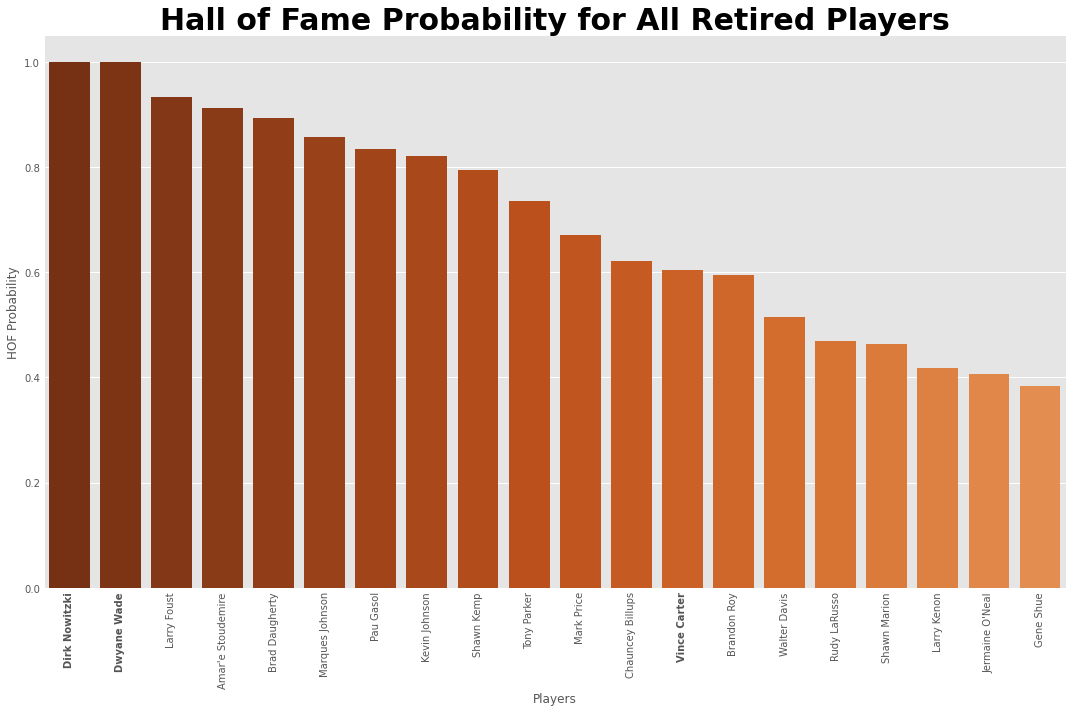

In [683]:
plt.figure(figsize=(15,10))

ax = sns.barplot(x='Player', y='HOF Probability', 
        data=nba_players_hof_prob[(nba_players_hof_prob['Last Active'] < 2022) &
                                          (nba_players_hof_prob['Hall of Fame'] == 0) &
                                          (nba_players_hof_prob['Retired'] == 1)][:20], 
                                             palette=sns.color_palette("Oranges_r", 40))
ax.set_xticklabels(nba_players_hof_prob[(nba_players_hof_prob['Last Active'] < 2022) &
                                          (nba_players_hof_prob['Hall of Fame'] == 0) &
                                          (nba_players_hof_prob['Retired'] == 1)]['Player'][:20], rotation=90)
for player in retired_first_ballot: ax.get_xticklabels()[player].set_weight('bold')
ax.set(xlabel='Players', ylabel='HOF Probability')
plt.title('Hall of Fame Probability for All Retired Players', fontsize=30, fontweight='bold')
plt.tight_layout()

plt.savefig('graphs/all_retired_hof_prob.png')
plt.show()

## Results and Evalution:

## Ethical Consideration:
**Legal Issues?:** <br>

Web scraping is legal if you scrape data publicly available on the internet. But some kinds of data are protected by international regulations, so we have to be careful scraping personal data, intellectual property, or confidential data. <br>

Though, some sites are likely to ban you if you scrape a site too much or too quickly. So far, I haven't had any problems with Basketball-Reference. To be safe, downloading the webpages are the best bet if you are trying to scrape large amounts of data. <br> <br>

**According to [clause 5](https://www.sports-reference.com/termsofuse.html) of Sports Reference:**

- Subject to the terms of this Agreement, you are granted a limited, personal, non-exclusive, non-sublicensable, non-assignable, non-transferable, and revocable license to access and use the Site and Content.
- This means that you should not create websites or tools based on data you scrape from Sports Reference or any of our sites.
- **Ultimately, I am granted to web scrap this website only for personal use and won't use my findings or tools to sell any information, or to create a personal website.** <br>

My project won’t harm the website in any way. More information on data usage can be found [here](https://www.sports-reference.com/data_use.html)

- What factors make a player likely to be inducted into the hall of fame?
- What is the probablity of making it to the hall of famer for recently retired and current players?
- Do championships alone determine a players greatness, or can a player be considered an all-time great without a championship?
- What are the most common variables among current hall of famers? Which provide the strongest correlations?
- Can I create a probabilistic classification model to predict the probability a player has to be chosen as a hall of famer based only on current stats?
- Can I create binary classification model to predict which current and recently retired players are going to be first ballot inductees?

## Project Summary:
- What is an overview of your project?
- What are your project objectives?
- What are your technical contributions?
- What are the main results?
- How are the results evaluated?
- What are the future directions?